In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, matthews_corrcoef

In [8]:
str_results = pd.read_csv("../run_all_models_scripts/structural_model_held_out_test_results.csv")
phy_results = pd.read_csv("../run_all_models_scripts/physicochemical_model_held_out_test_results.csv")
img_results = pd.read_csv("../run_all_models_scripts/cellpainting_model_held_out_test_results.csv")
ge_results = pd.read_csv("../run_all_models_scripts/LINCSL1000_model_held_out_test_results.csv")
go_results = pd.read_csv("../run_all_models_scripts/GO_model_held_out_test_results.csv")
pid_results = pd.read_csv("../run_all_models_scripts/CellScape_model_held_out_test_results.csv") 
pid_cmu_results = pd.read_csv("../run_all_models_scripts/CellScape_Cmax_unbound_model_held_out_test_results.csv") 
pid_cmt_results = pd.read_csv("../run_all_models_scripts/CellScape_Cmax_total_model_held_out_test_results.csv") 
moa_results = pd.read_csv("../run_all_models_scripts/MOA_model_held_out_test_results.csv") 
moa_cmu_results = pd.read_csv("../run_all_models_scripts/MOA_Cmax_unbound_model_held_out_test_results.csv") 
moa_cmt_results = pd.read_csv("../run_all_models_scripts/MOA_Cmax_total_model_held_out_test_results.csv") 

str_results["Features"] ="Structural"
phy_results["Features"] ="Mordred"
img_results["Features"] ="Cell Painting"
ge_results["Features"] ="LINCSL1000"
go_results["Features"] ="GeneOntology"
pid_results["Features"] ="CellScape"
pid_cmu_results["Features"] ="CellScape with Cmax unbound"
pid_cmt_results["Features"] ="CellScape with Cmax total"
moa_results["Features"] ="MOA"
moa_cmu_results["Features"] ="MOA with Cmax unbound"
moa_cmt_results["Features"] ="MOA with Cmax total"

In [9]:
ensemble_all_results = pd.read_csv("./Ensemble_all_models__held_out_test_results.csv") 
ensemble_selected_results = pd.read_csv("./Ensemble_selected_models__held_out_test_results.csv") 

ensemble_all_results["Features"] ="Ensemble (all models)"
ensemble_selected_results["Features"] ="Ensemble (selected models)"

In [10]:
str_results

Dataset                          Actviity  \
0    cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
1    cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
2    cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
3    cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
4    cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
..                              ...                               ...   
488                        DICTrank                          DICTrank   
489                        DICTrank                          DICTrank   
490                        DICTrank                          DICTrank   
491                        DICTrank                          DICTrank   
492                        DICTrank                          DICTrank   

                                                SMILES  True_Value  \
0        O=C(C1CCCCC1)[NH+]1CC(=O)[NH+]2CCc3ccccc3C2C1           1   
1                  CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1           1   
2                   C[NH+](C)CCC=C1c2ccccc2CCc2ccccc21           1   
3    CC(=O)[NH+]1CCN(c2ccc(OCC3COC(Cn4ccnc4)(c4ccc(...           1   
4                    Cc1nccn1CC1CCc2c(c3ccccc3n2C)C1=O           1   
..                                                 ...         ...   
488                         CCC1(c2ccccc2)C(=O)NCNC1=O           0   
489   CCOC(=O)[NH+]1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1           0   
490                 CCCSc1ccc2[n-]c(=NC(=O)OC)[n-]c2c1           0   
491          CCC[NH+](CCC)S(=O)(=O)c1ccc(C(=O)[O-])cc1           0   
492                 CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC           0   

     Prediction  Probability  Best_Threshold    Features  
0             1     0.664392        0.541602  Structural  
1             1     0.562749        0.541602  Structural  
2             1     0.613492        0.541602  Structural  
3             0     0.441763        0.541602  Structural  
4             1     0.551398        0.541602  Structural  
..          ...          ...             ...         ...  
488           0     0.536495        0.549585  Structural  
489           1     0.555763        0.549585  Structural  
490           0     0.523943        0.549585  Structural  
491           1     0.611275        0.549585  Structural  
492           0     0.441161        0.549585  Structural  

[493 rows x 8 columns]

In [28]:
allresults = pd.concat([str_results, phy_results, img_results, ge_results, go_results, 
                        pid_results, 
                        moa_results, pid_cmu_results,
                        pid_cmt_results, moa_cmu_results,
                        moa_cmt_results, ensemble_all_results,
                        ensemble_selected_results]).sort_values(["Dataset", "SMILES"],
                                                  ascending=[False, False]).reset_index(drop=True)
allresults=allresults[allresults["Dataset"]!="sider_cardiacdisorders"].reset_index(drop=True)
allresults

Dataset                          Actviity  \
0     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
1     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
2     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
3     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
4     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
...                              ...                               ...   
4547                        DICTrank                          DICTrank   
4548                        DICTrank                          DICTrank   
4549                        DICTrank                          DICTrank   
4550                        DICTrank                          DICTrank   
4551                        DICTrank                          DICTrank   

                                               SMILES  True_Value  Prediction  \
0                    [NH3+]CC(CC(=O)[O-])c1ccc(Cl)cc1         1.0           1   
1     OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1         1.0           1   
2     OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1         1.0           1   
3     OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1         1.0           1   
4     OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1         1.0           1   
...                                               ...         ...         ...   
4547          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           1   
4548          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           0   
4549          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           0   
4550          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           1   
4551          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           1   

      Probability  Best_Threshold                    Features  
0        0.509704        0.500000       Ensemble (all models)  
1        0.747007        0.541602                  Structural  
2        0.859187        0.534617                     Mordred  
3        0.610511        0.404779               Cell Painting  
4        0.580656        0.553171                  LINCSL1000  
...           ...             ...                         ...  
4547     0.680339        0.660530                   CellScape  
4548     0.473910        0.501764                         MOA  
4549     0.644047        0.668763   CellScape with Cmax total  
4550     0.674124        0.638081         MOA with Cmax total  
4551     0.512649        0.500000  Ensemble (selected models)  

[4552 rows x 8 columns]

In [29]:
allresults[allresults["Dataset"]=="DICTrank"].Features.value_counts()

Structural                     90
Mordred                        90
Cell Painting                  90
LINCSL1000                     90
GeneOntology                   90
CellScape                      90
MOA                            90
CellScape with Cmax total      90
MOA with Cmax total            90
Ensemble (selected models)     90
Ensemble (all models)          82
CellScape with Cmax unbound    78
MOA with Cmax unbound          78
Name: Features, dtype: int64

In [30]:
def scale_probability(prob, threshold):
    if prob <= threshold:
        return prob / (2 * threshold)
    else:
        return 1 - (1 - prob) / (2 * (1 - threshold))

allresults['Scaled_Probability'] = allresults.apply(lambda row: scale_probability(row['Probability'], row['Best_Threshold']), axis=1)
allresults

Dataset                          Actviity  \
0     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
1     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
2     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
3     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
4     cardiotox_with_sider_inactives  Cardiotox (with SIDER inactives)   
...                              ...                               ...   
4547                        DICTrank                          DICTrank   
4548                        DICTrank                          DICTrank   
4549                        DICTrank                          DICTrank   
4550                        DICTrank                          DICTrank   
4551                        DICTrank                          DICTrank   

                                               SMILES  True_Value  Prediction  \
0                    [NH3+]CC(CC(=O)[O-])c1ccc(Cl)cc1         1.0           1   
1     OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1         1.0           1   
2     OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1         1.0           1   
3     OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1         1.0           1   
4     OCCOCC[NH+]1CC[NH+](C(c2ccccc2)c2ccc(Cl)cc2)CC1         1.0           1   
...                                               ...         ...         ...   
4547          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           1   
4548          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           0   
4549          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           0   
4550          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           1   
4551          C=C(CC)C(=O)c1ccc(OCC(=O)[O-])c(Cl)c1Cl         1.0           1   

      Probability  Best_Threshold                    Features  \
0        0.509704        0.500000       Ensemble (all models)   
1        0.747007        0.541602                  Structural   
2        0.859187        0.534617                     Mordred   
3        0.610511        0.404779               Cell Painting   
4        0.580656        0.553171                  LINCSL1000   
...           ...             ...                         ...   
4547     0.680339        0.660530                   CellScape   
4548     0.473910        0.501764                         MOA   
4549     0.644047        0.668763   CellScape with Cmax total   
4550     0.674124        0.638081         MOA with Cmax total   
4551     0.512649        0.500000  Ensemble (selected models)   

      Scaled_Probability  
0               0.509704  
1               0.724046  
2               0.848713  
3               0.672820  
4               0.530757  
...                  ...  
4547            0.529177  
4548            0.472244  
4549            0.481521  
4550            0.549795  
4551            0.512649  

[4552 rows x 9 columns]

In [31]:
allresults.to_csv("allresults_compounds_df_all_scores.csv", index=False)

In [32]:
allresults.Dataset.unique()

array(['cardiotox_with_sider_inactives', 'cardiotox_with_sider_all',
       'cardiotox_with_sider_actives', 'DICTrank'], dtype=object)

In [33]:
allresults.Features.unique()

array(['Ensemble (all models)', 'Structural', 'Mordred', 'Cell Painting',
       'LINCSL1000', 'GeneOntology', 'CellScape', 'MOA',
       'CellScape with Cmax unbound', 'CellScape with Cmax total',
       'MOA with Cmax unbound', 'MOA with Cmax total',
       'Ensemble (selected models)'], dtype=object)

In [34]:
larger_test_selected_list= ['Structural', 'Mordred', 'MOA','CellScape', 
                           "CellScape with Cmax total", "MOA with Cmax total",
                           "Ensemble (selected models)"]

smaller_test_selected_list= ["Cell Painting", "LINCSL1000", "GeneOntology", "CellScape with Cmax unbound",
                             "MOA with Cmax unbound", "Ensemble (all models)"]




In [35]:
features_list =  ["Mordred", "Structural", "CellScape", "CellScape with Cmax total","CellScape with Cmax unbound",
                           "MOA","MOA with Cmax total","MOA with Cmax unbound",
                           "Cell Painting", "LINCSL1000", "GeneOntology","Ensemble (all models)",
                           "Ensemble (selected models)"]


cardiotox_with_sider_inactives
Structural
90
Mordred
90
MOA
90
CellScape
90
CellScape with Cmax total
90
MOA with Cmax total
90
Ensemble (selected models)
90


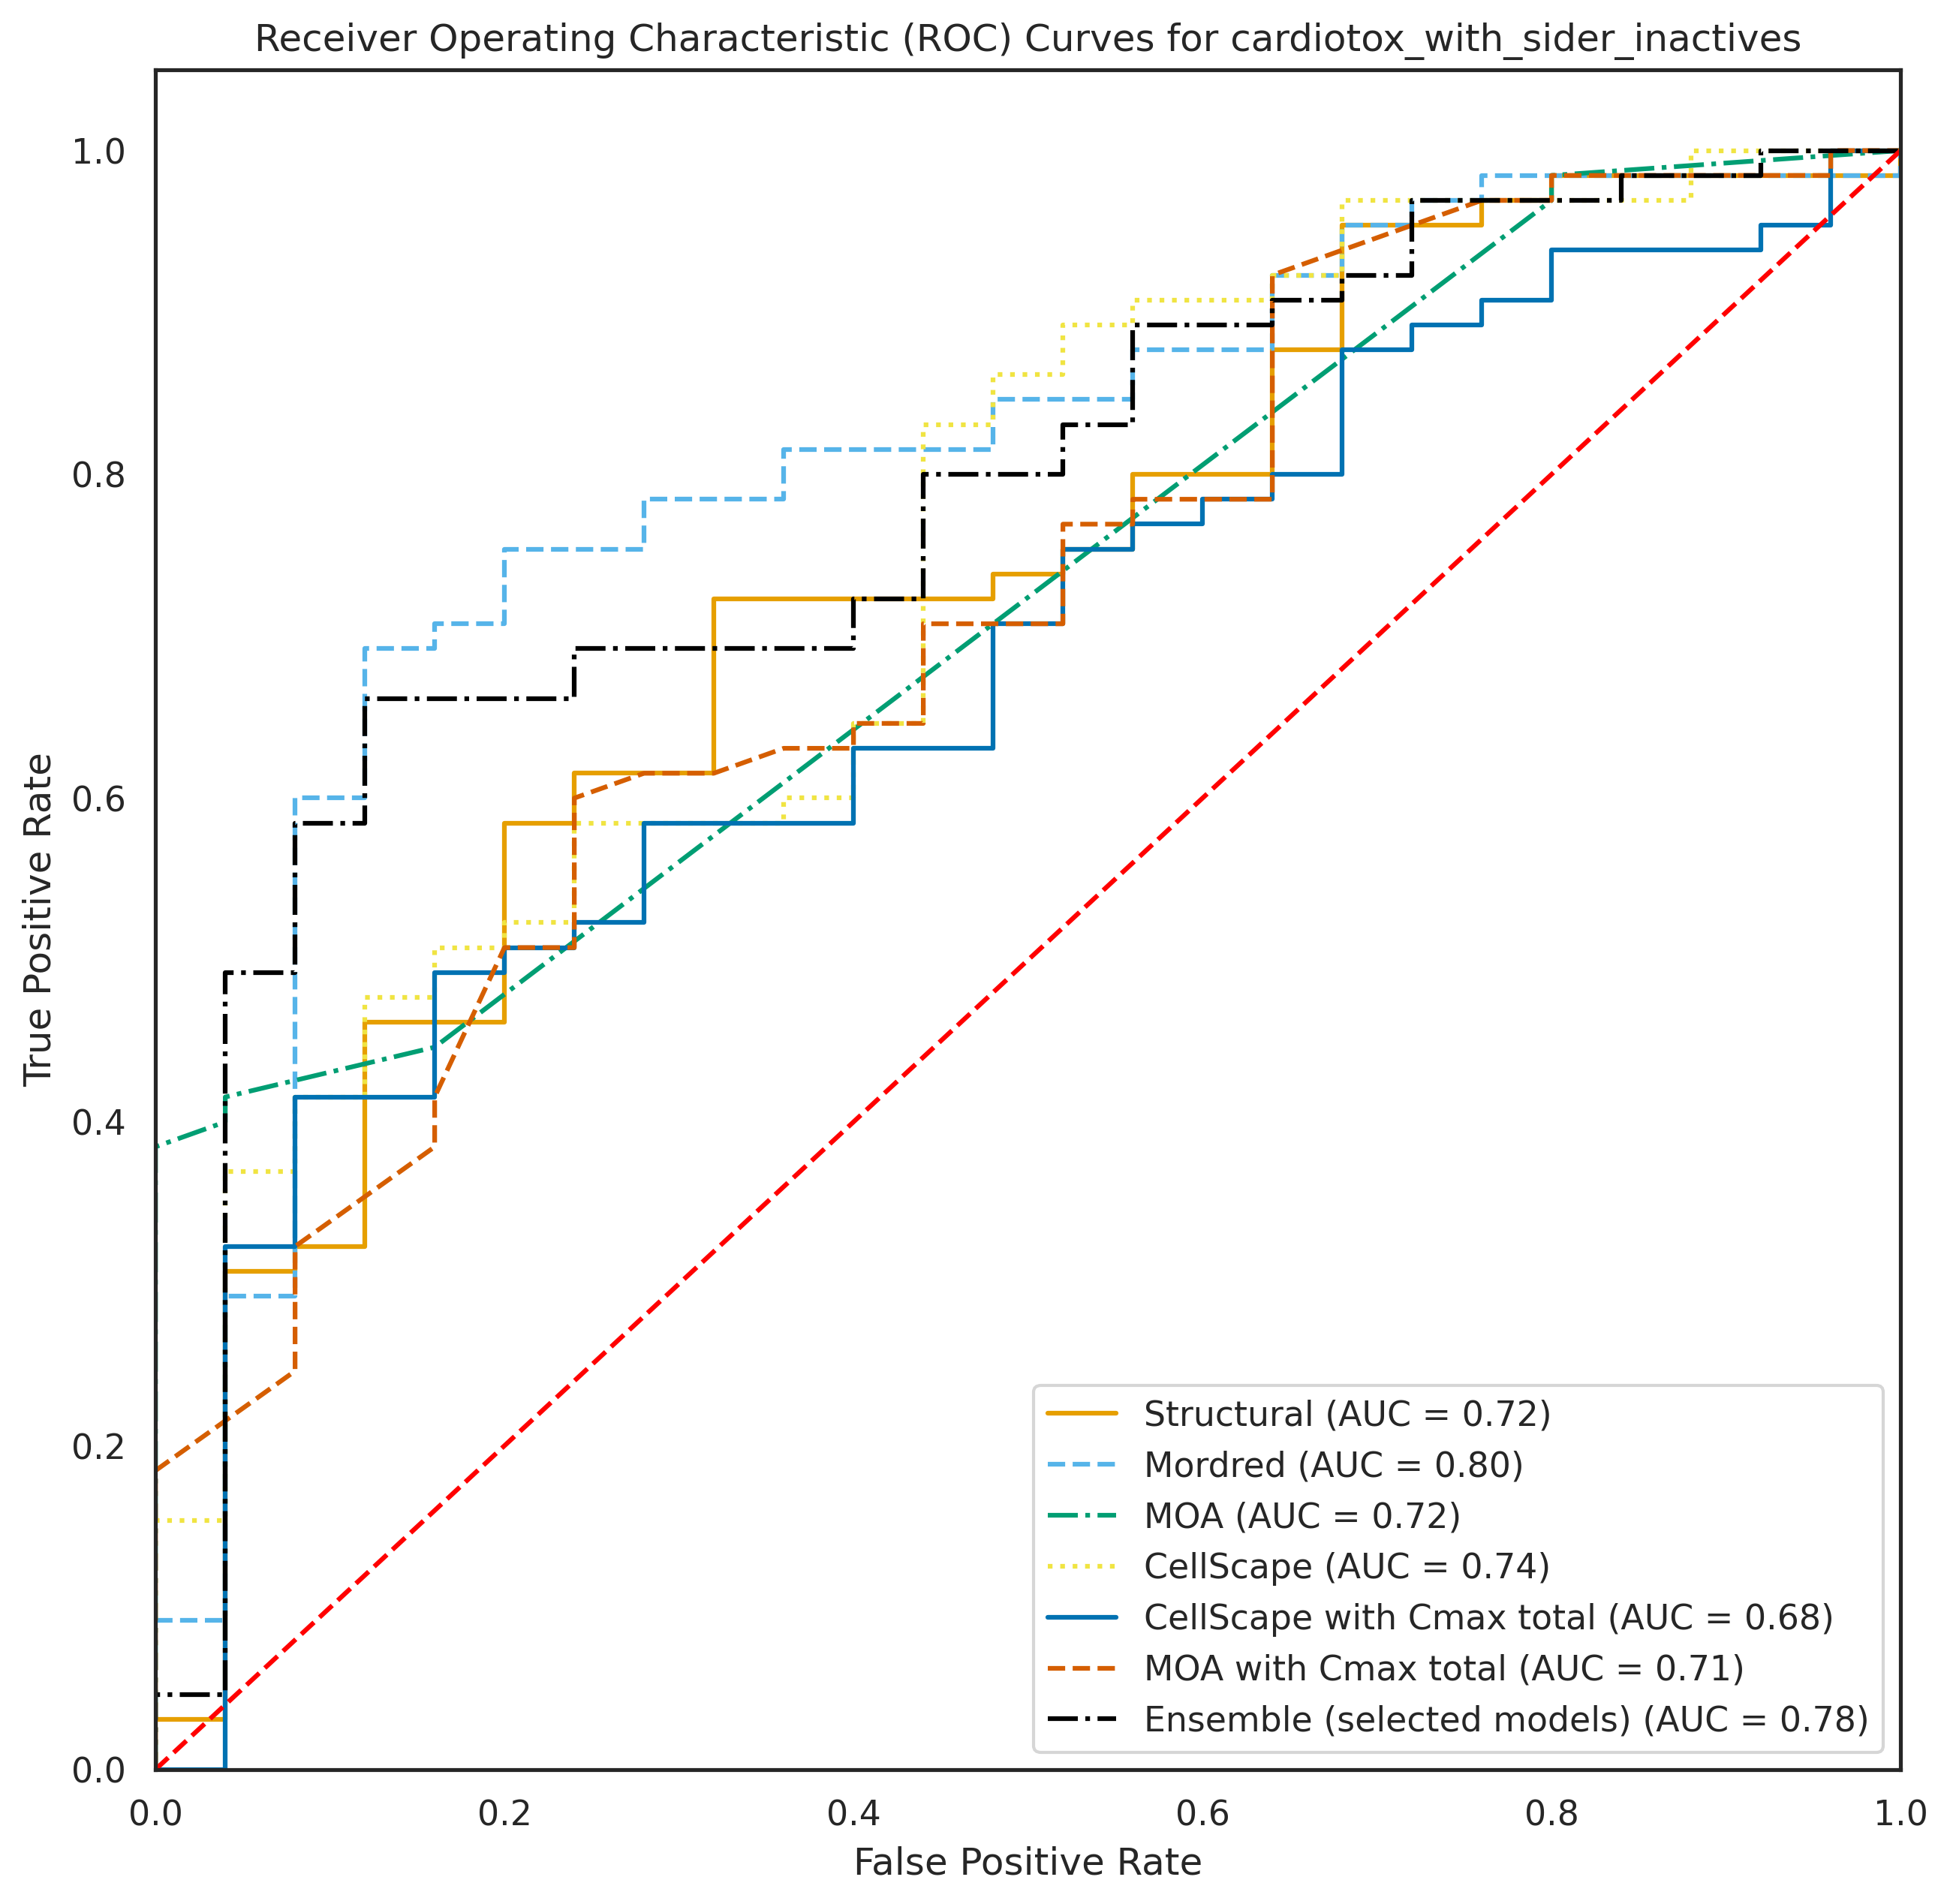

cardiotox_with_sider_all
Structural
90
Mordred
90
MOA
90
CellScape
90
CellScape with Cmax total
90
MOA with Cmax total
90
Ensemble (selected models)
90


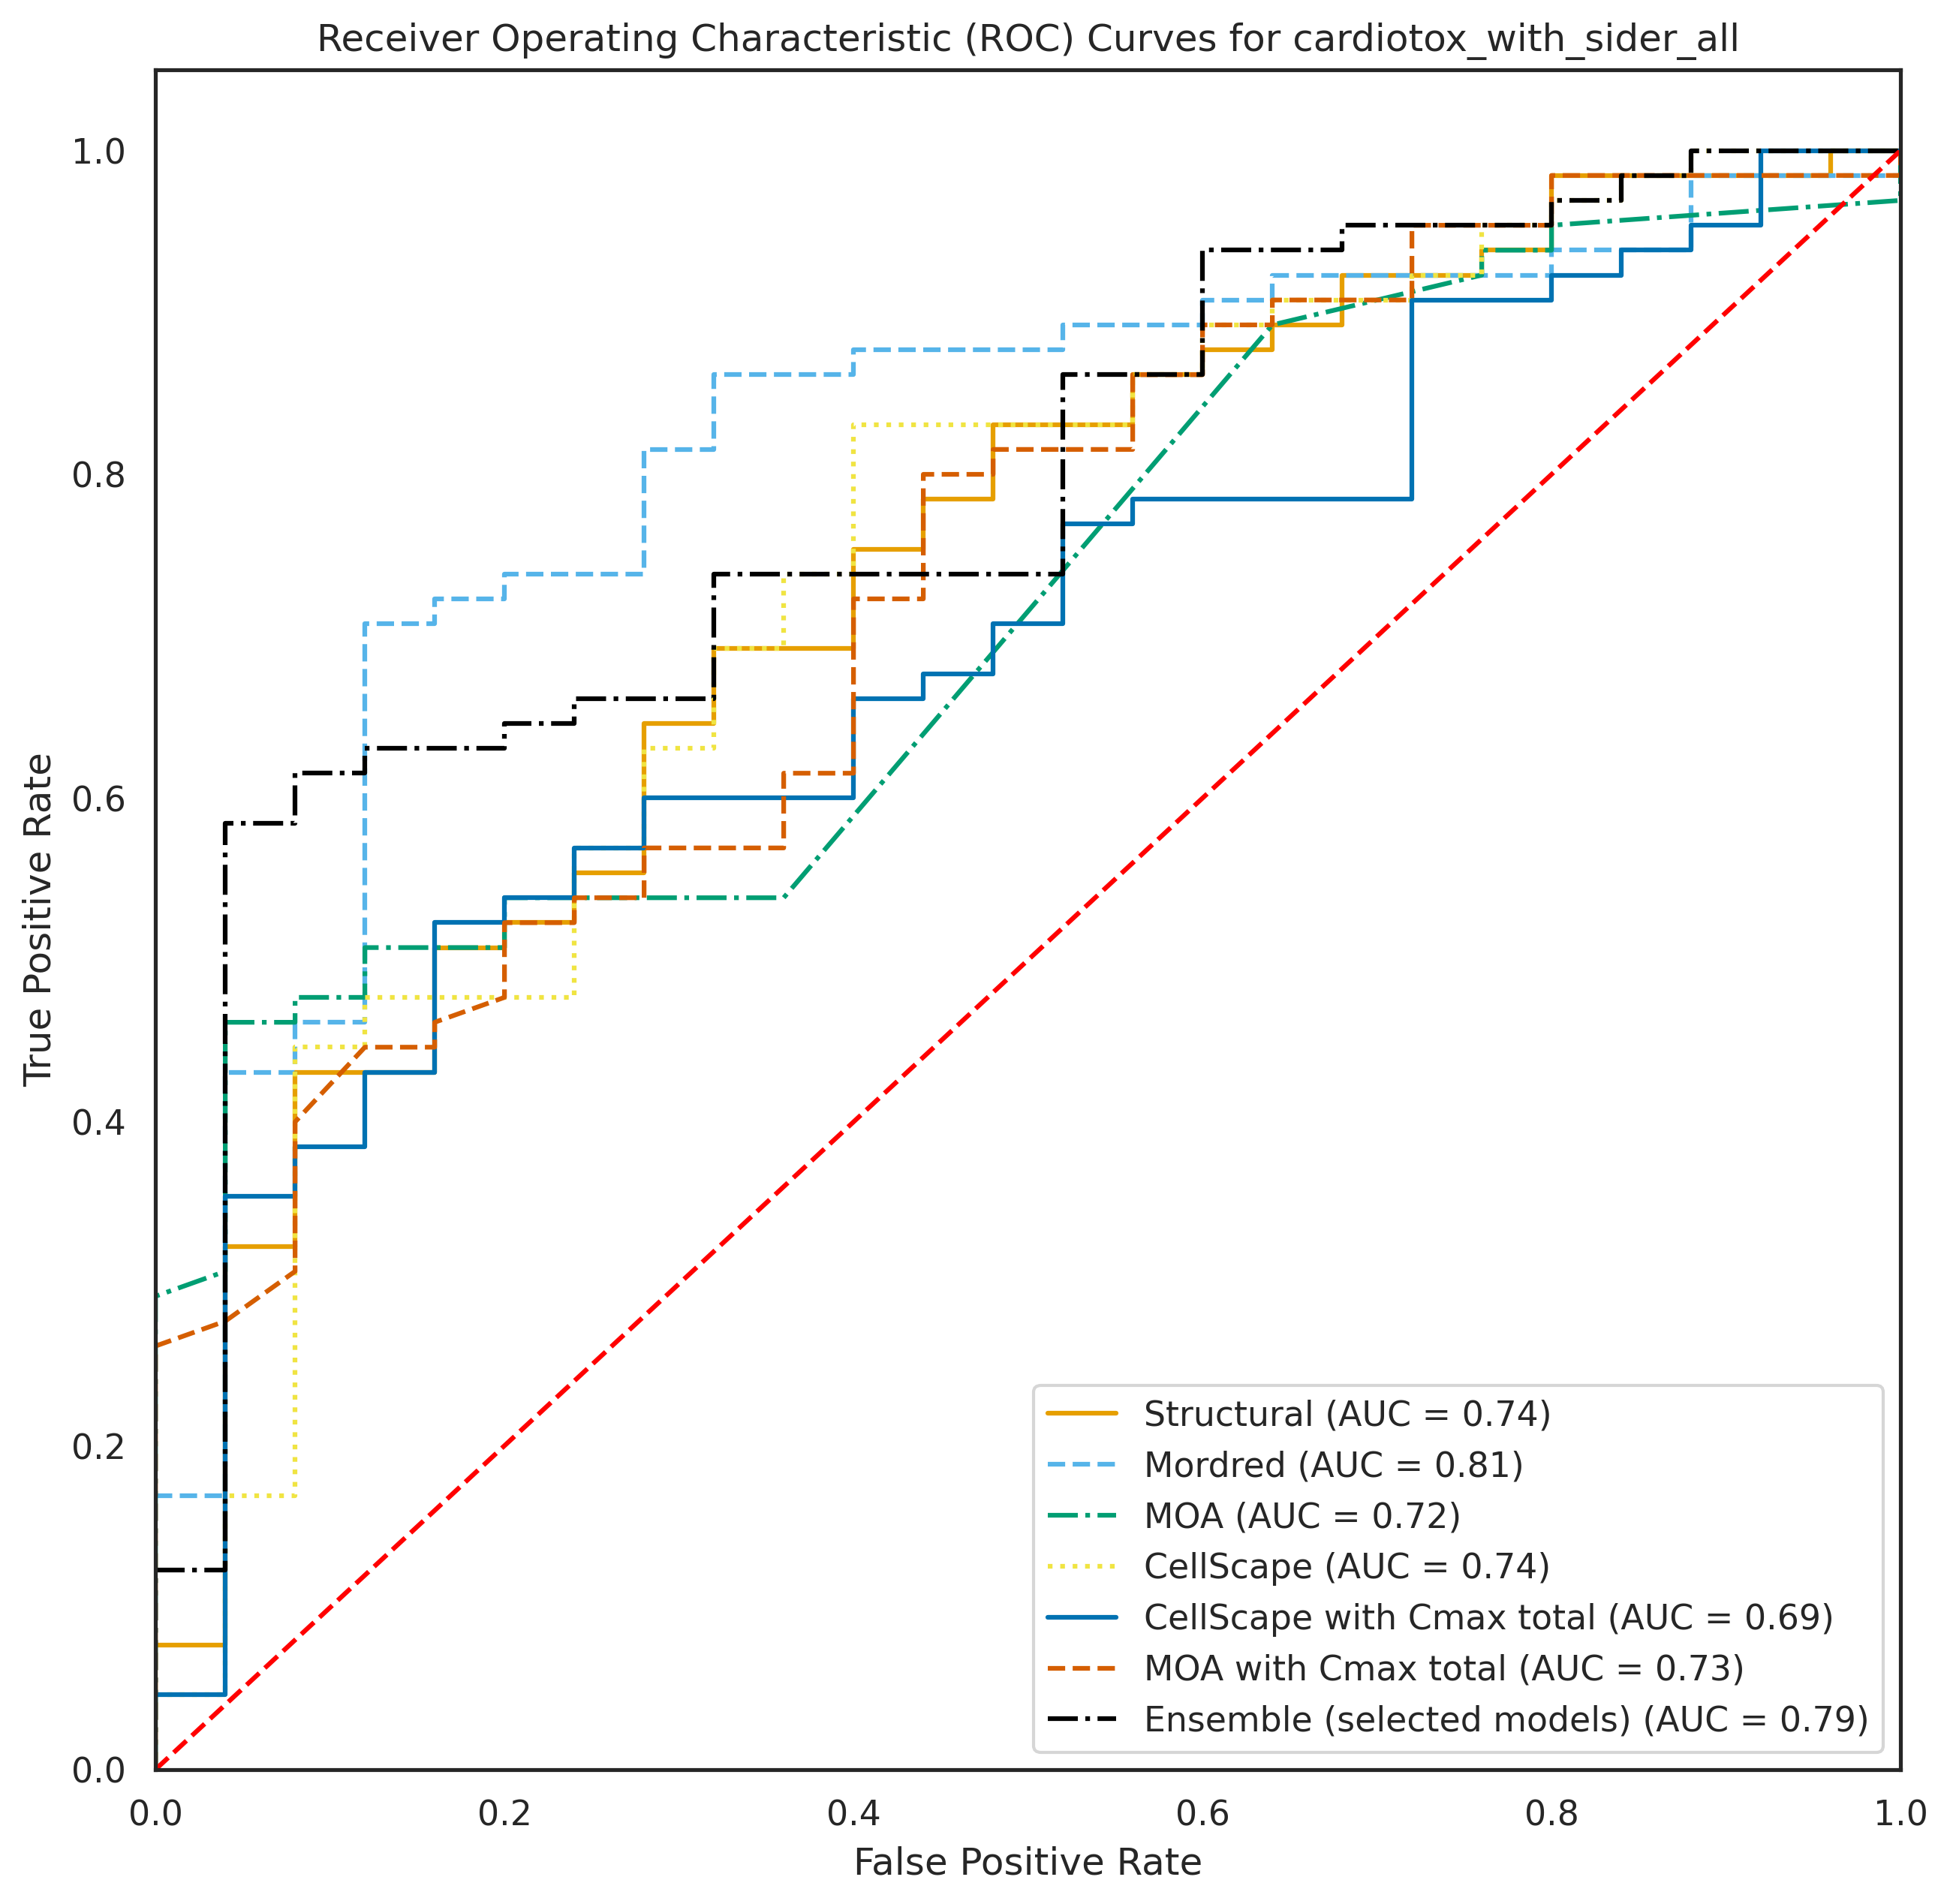

cardiotox_with_sider_actives
Structural
90
Mordred
90
MOA
90
CellScape
90
CellScape with Cmax total
90
MOA with Cmax total
90
Ensemble (selected models)
90


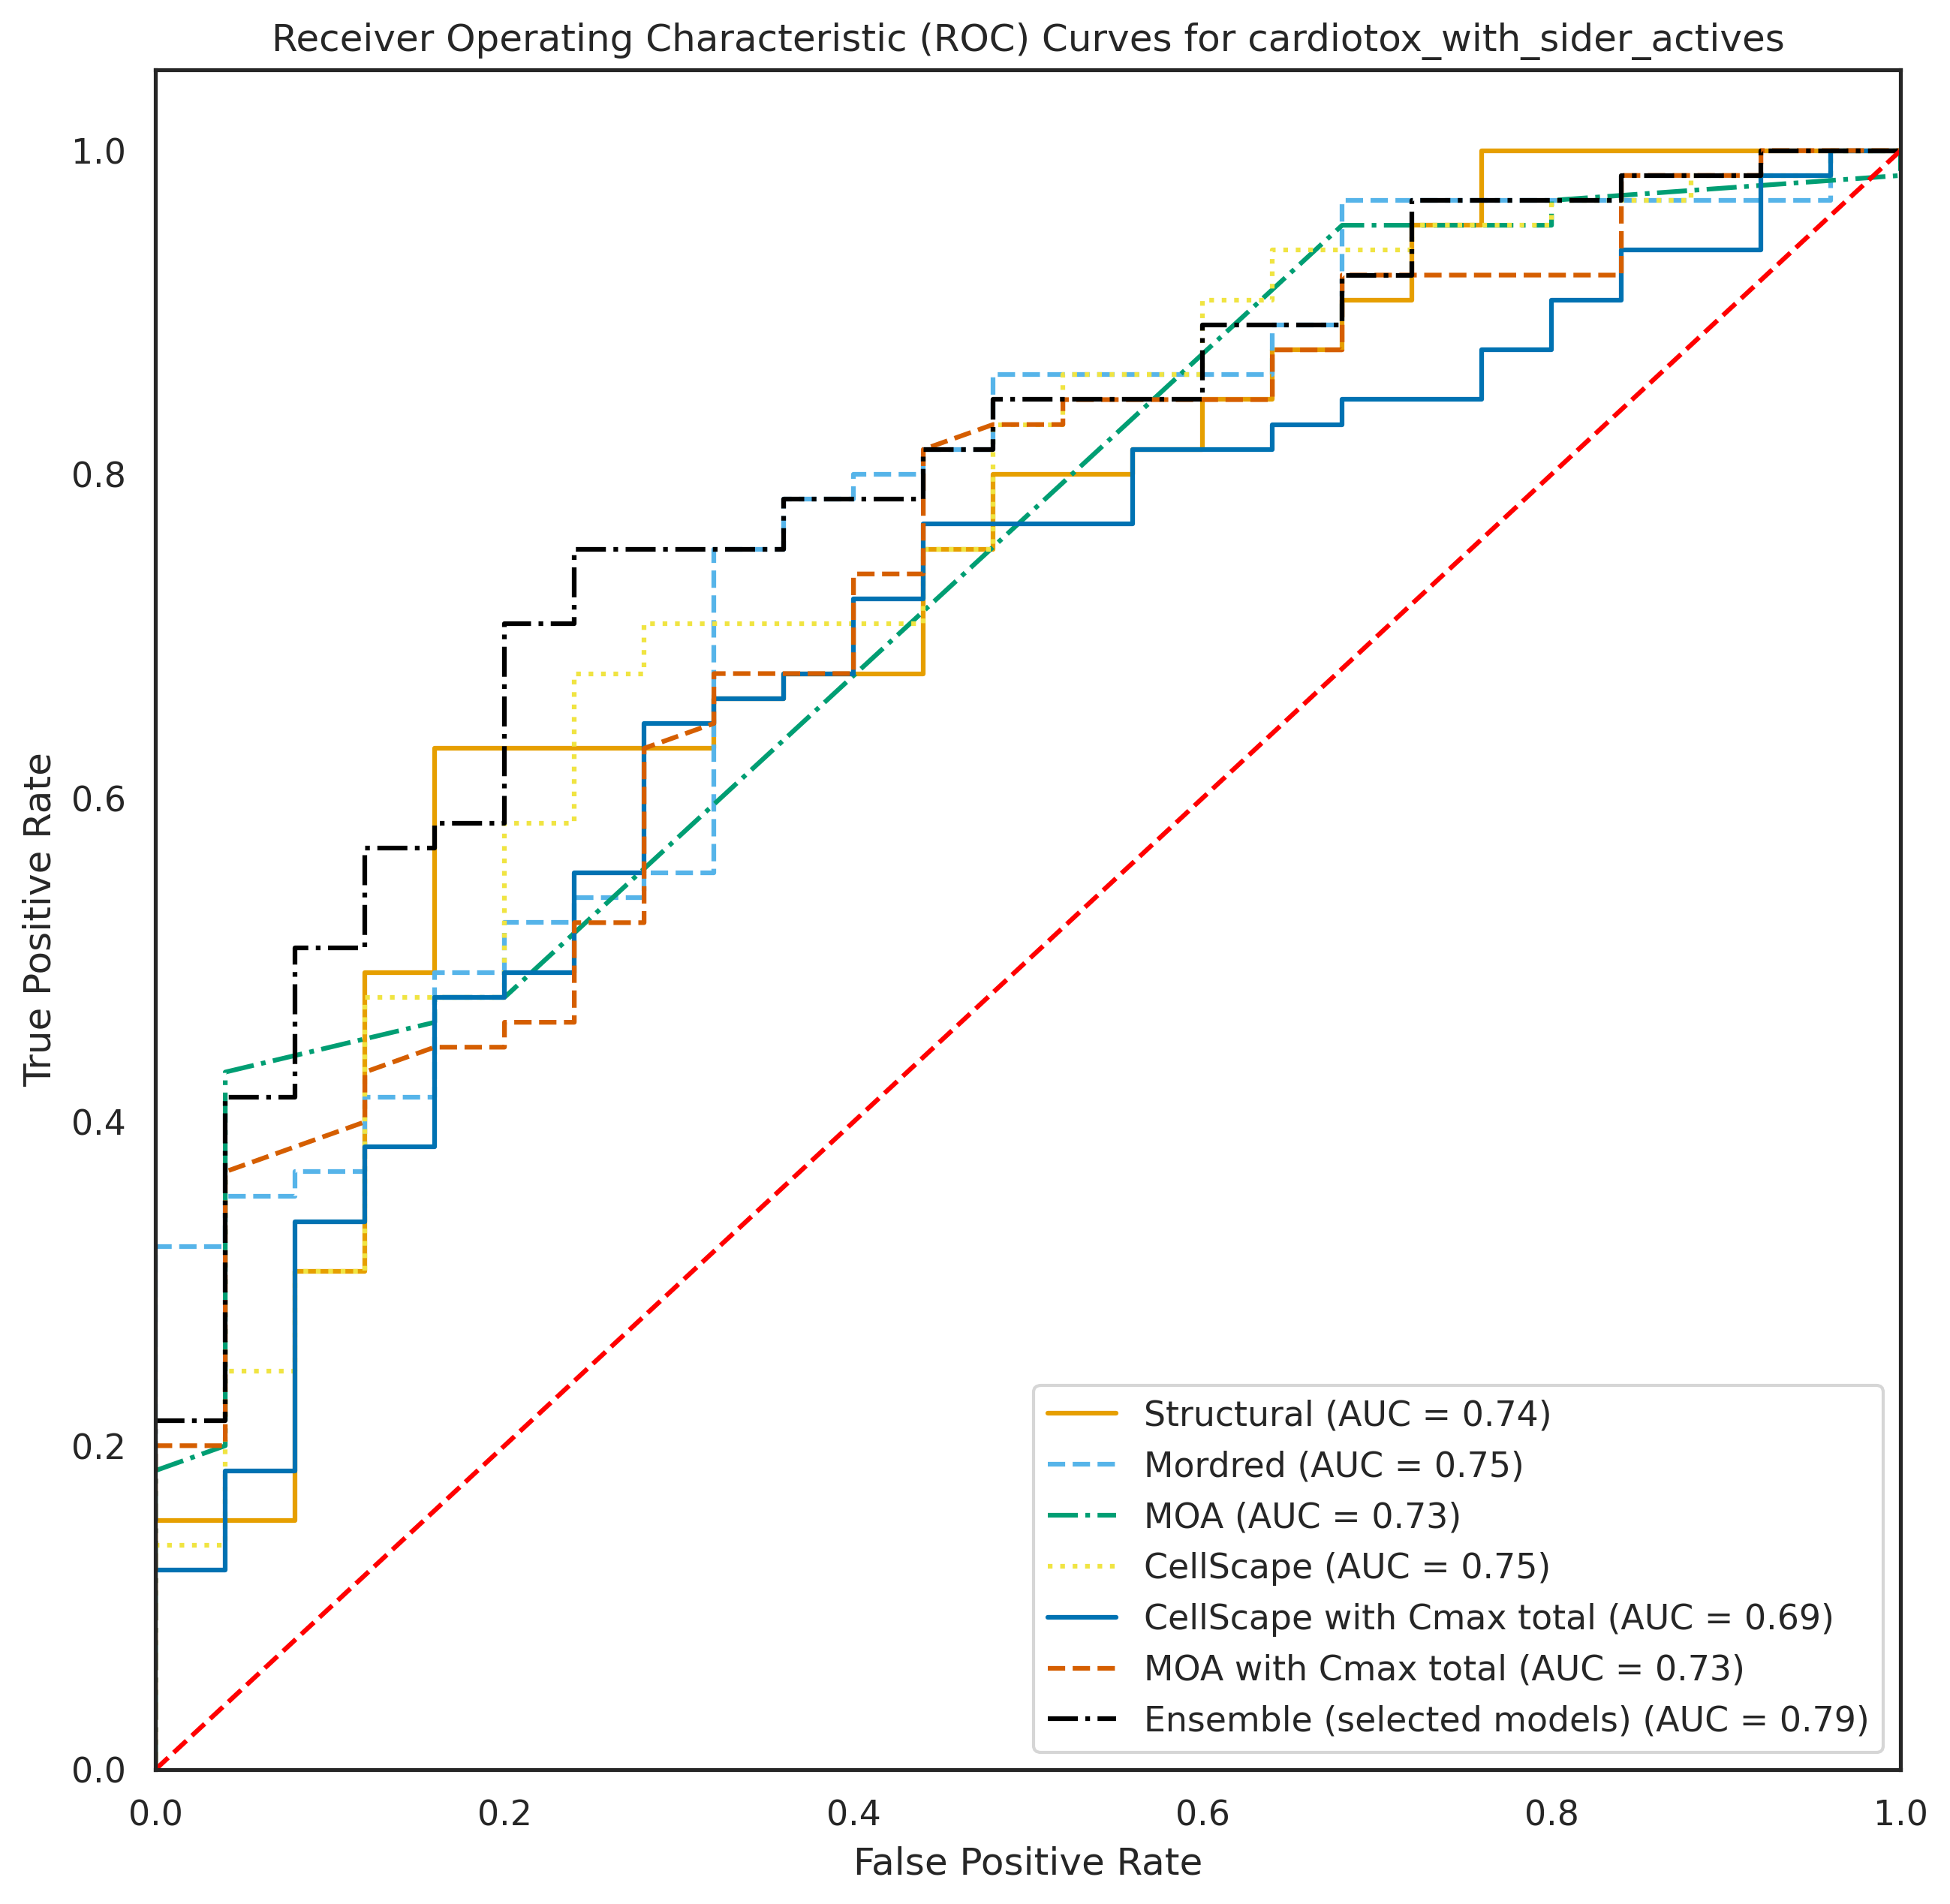

DICTrank
Structural
90
Mordred
90
MOA
90
CellScape
90
CellScape with Cmax total
90
MOA with Cmax total
90
Ensemble (selected models)
90


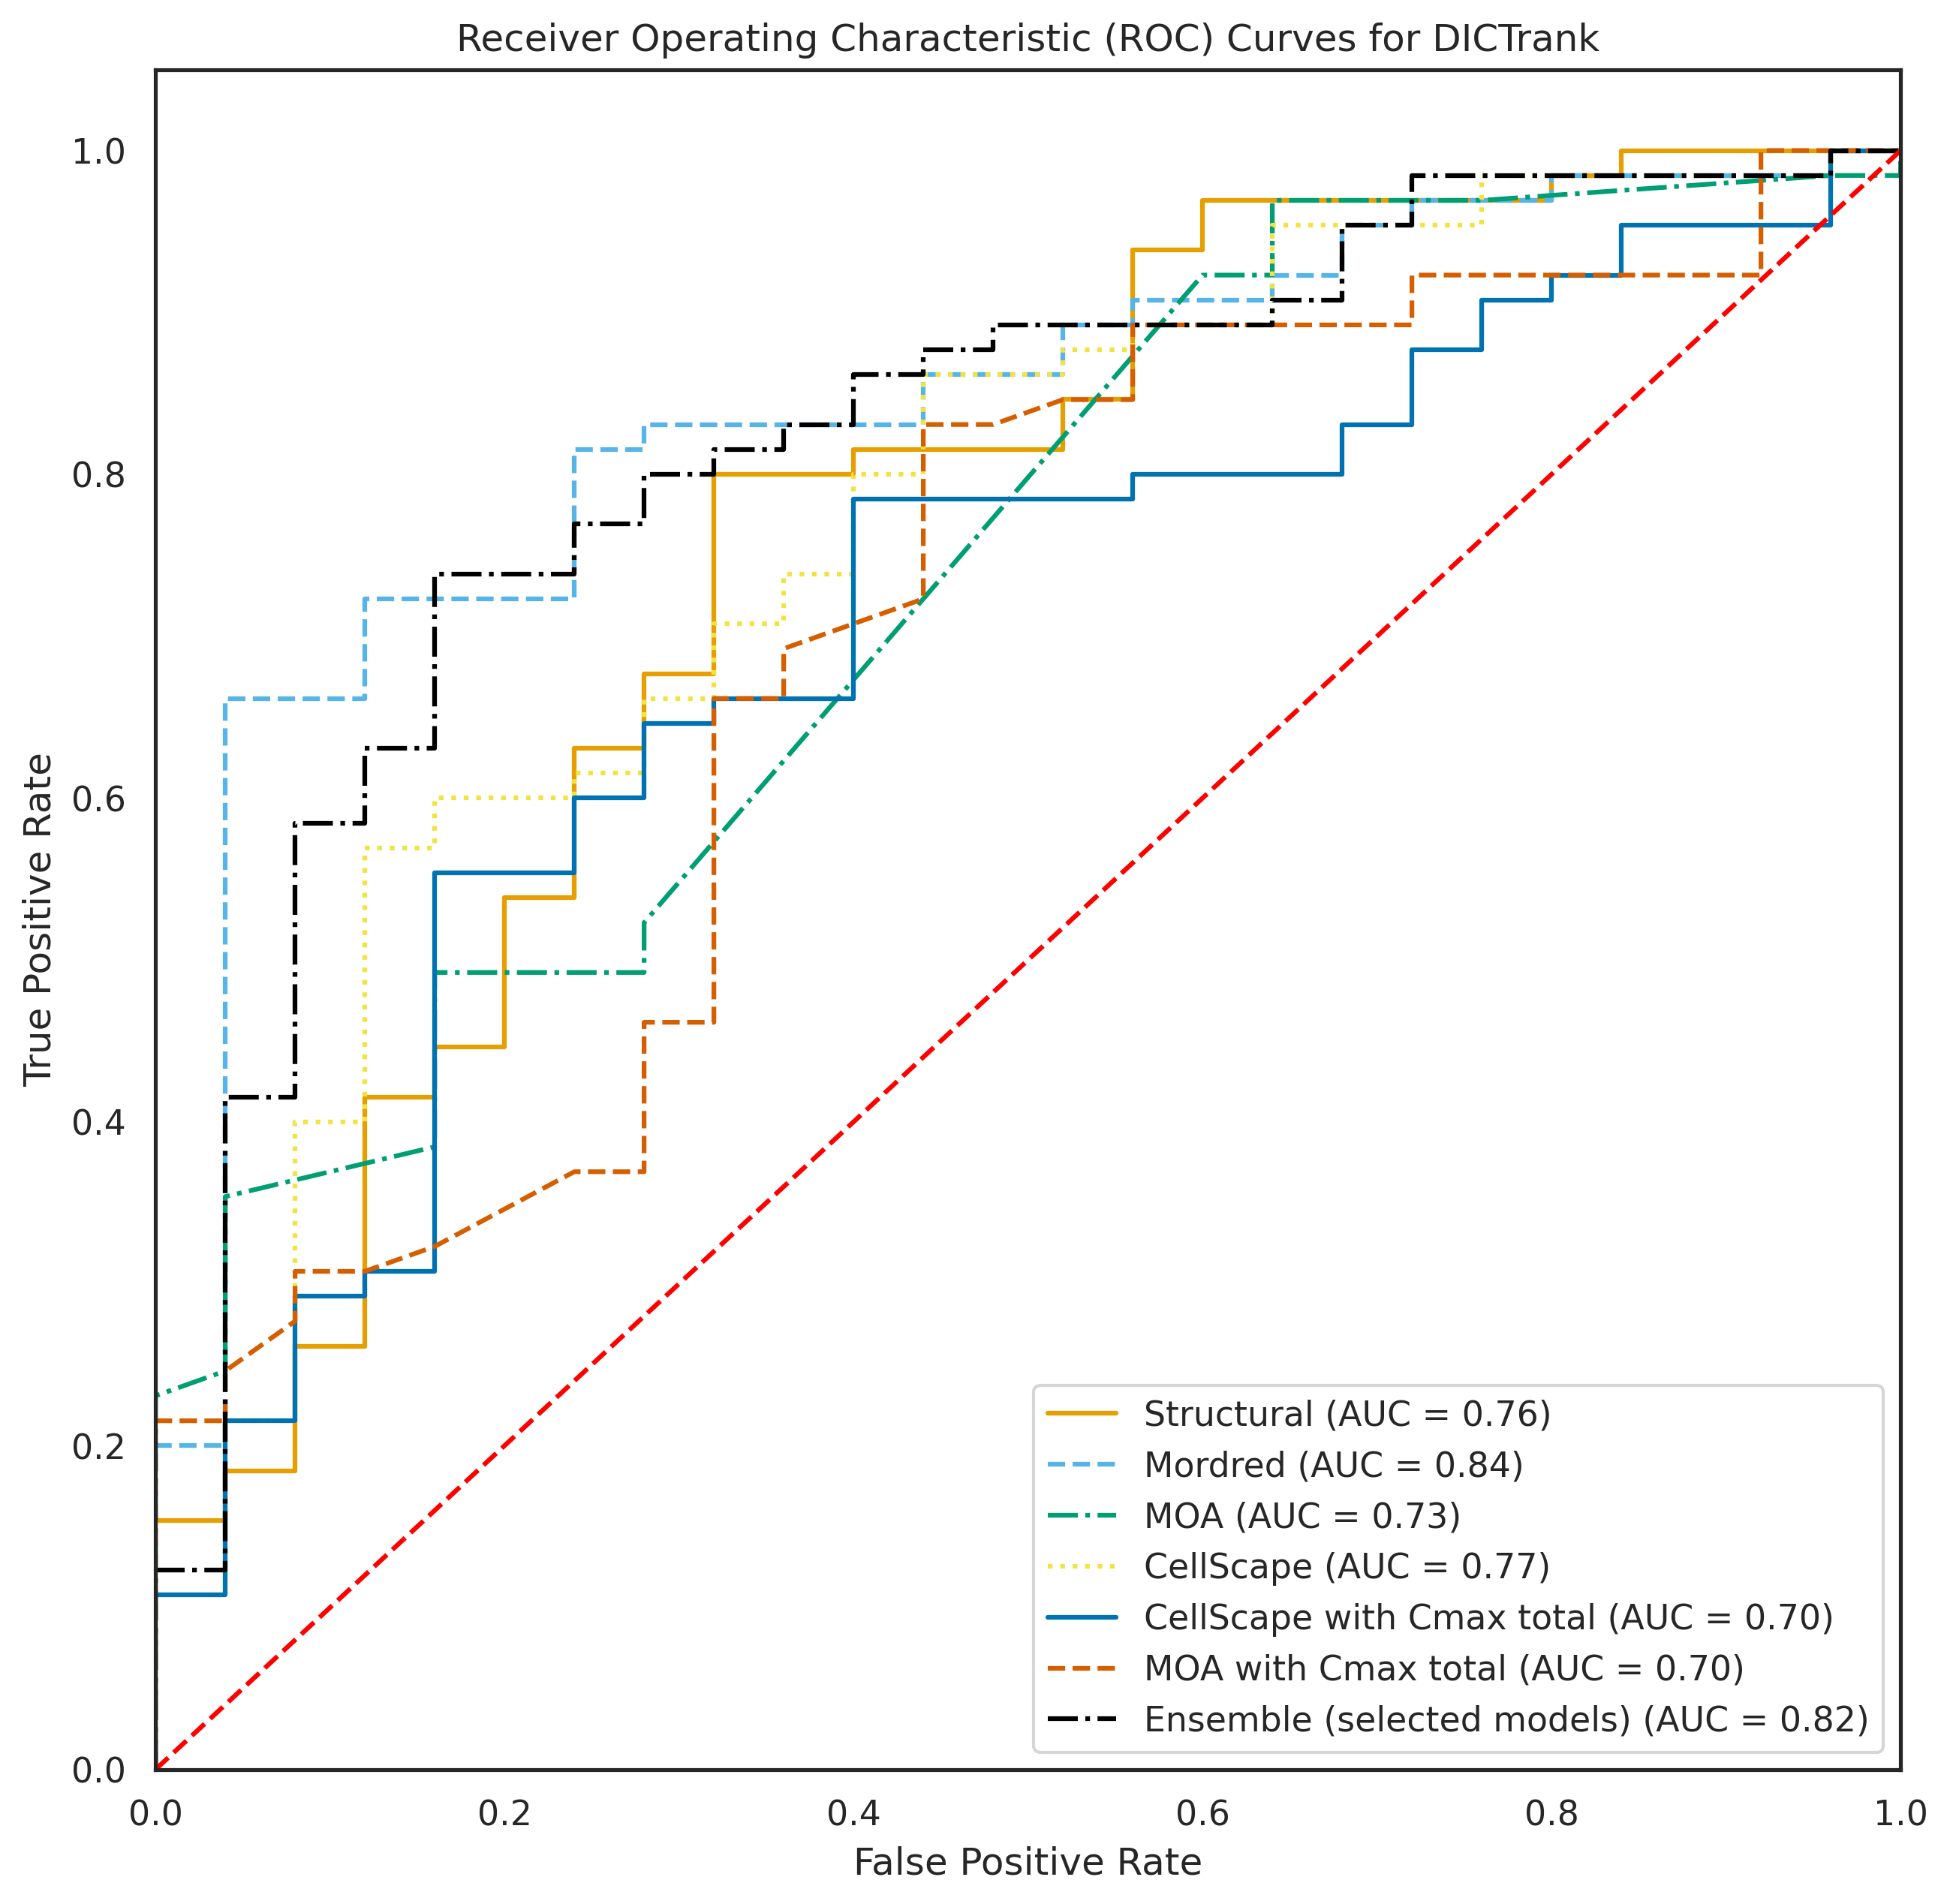

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Define a colorblind-friendly palette and line styles
palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#000000"] 

line_styles = ['solid', 'dashed', 'dashdot', 'dotted']

# Loop through each dataset
for dataset in ['cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives', 'DICTrank']:
    print(dataset)
    df_dataset = allresults[allresults["Dataset"] == dataset]
    
    plt.figure(figsize=(10, 10), dpi=300) 
    sns.set(style="white")  # Set the style
    
    # For each unique feature in the dataset, plot the AUC curve
    for idx, feature in enumerate(larger_test_selected_list):
        print(feature)
        df_feature = df_dataset[df_dataset["Features"] == feature]
        print(len(df_feature))
        fpr, tpr, _ = roc_curve(df_feature["True_Value"], df_feature["Probability"])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.2f})', 
                 color=palette[idx % len(palette)],
                 linestyle=line_styles[idx % len(line_styles)])
    
    
    # Aesthetics for the plot
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves for {dataset}')
    plt.legend(loc='lower right')
    plt.show()


cardiotox_with_sider_inactives
Cell Painting
90
LINCSL1000
90
GeneOntology
90
CellScape with Cmax unbound
78
MOA with Cmax unbound
78
Ensemble (all models)
82


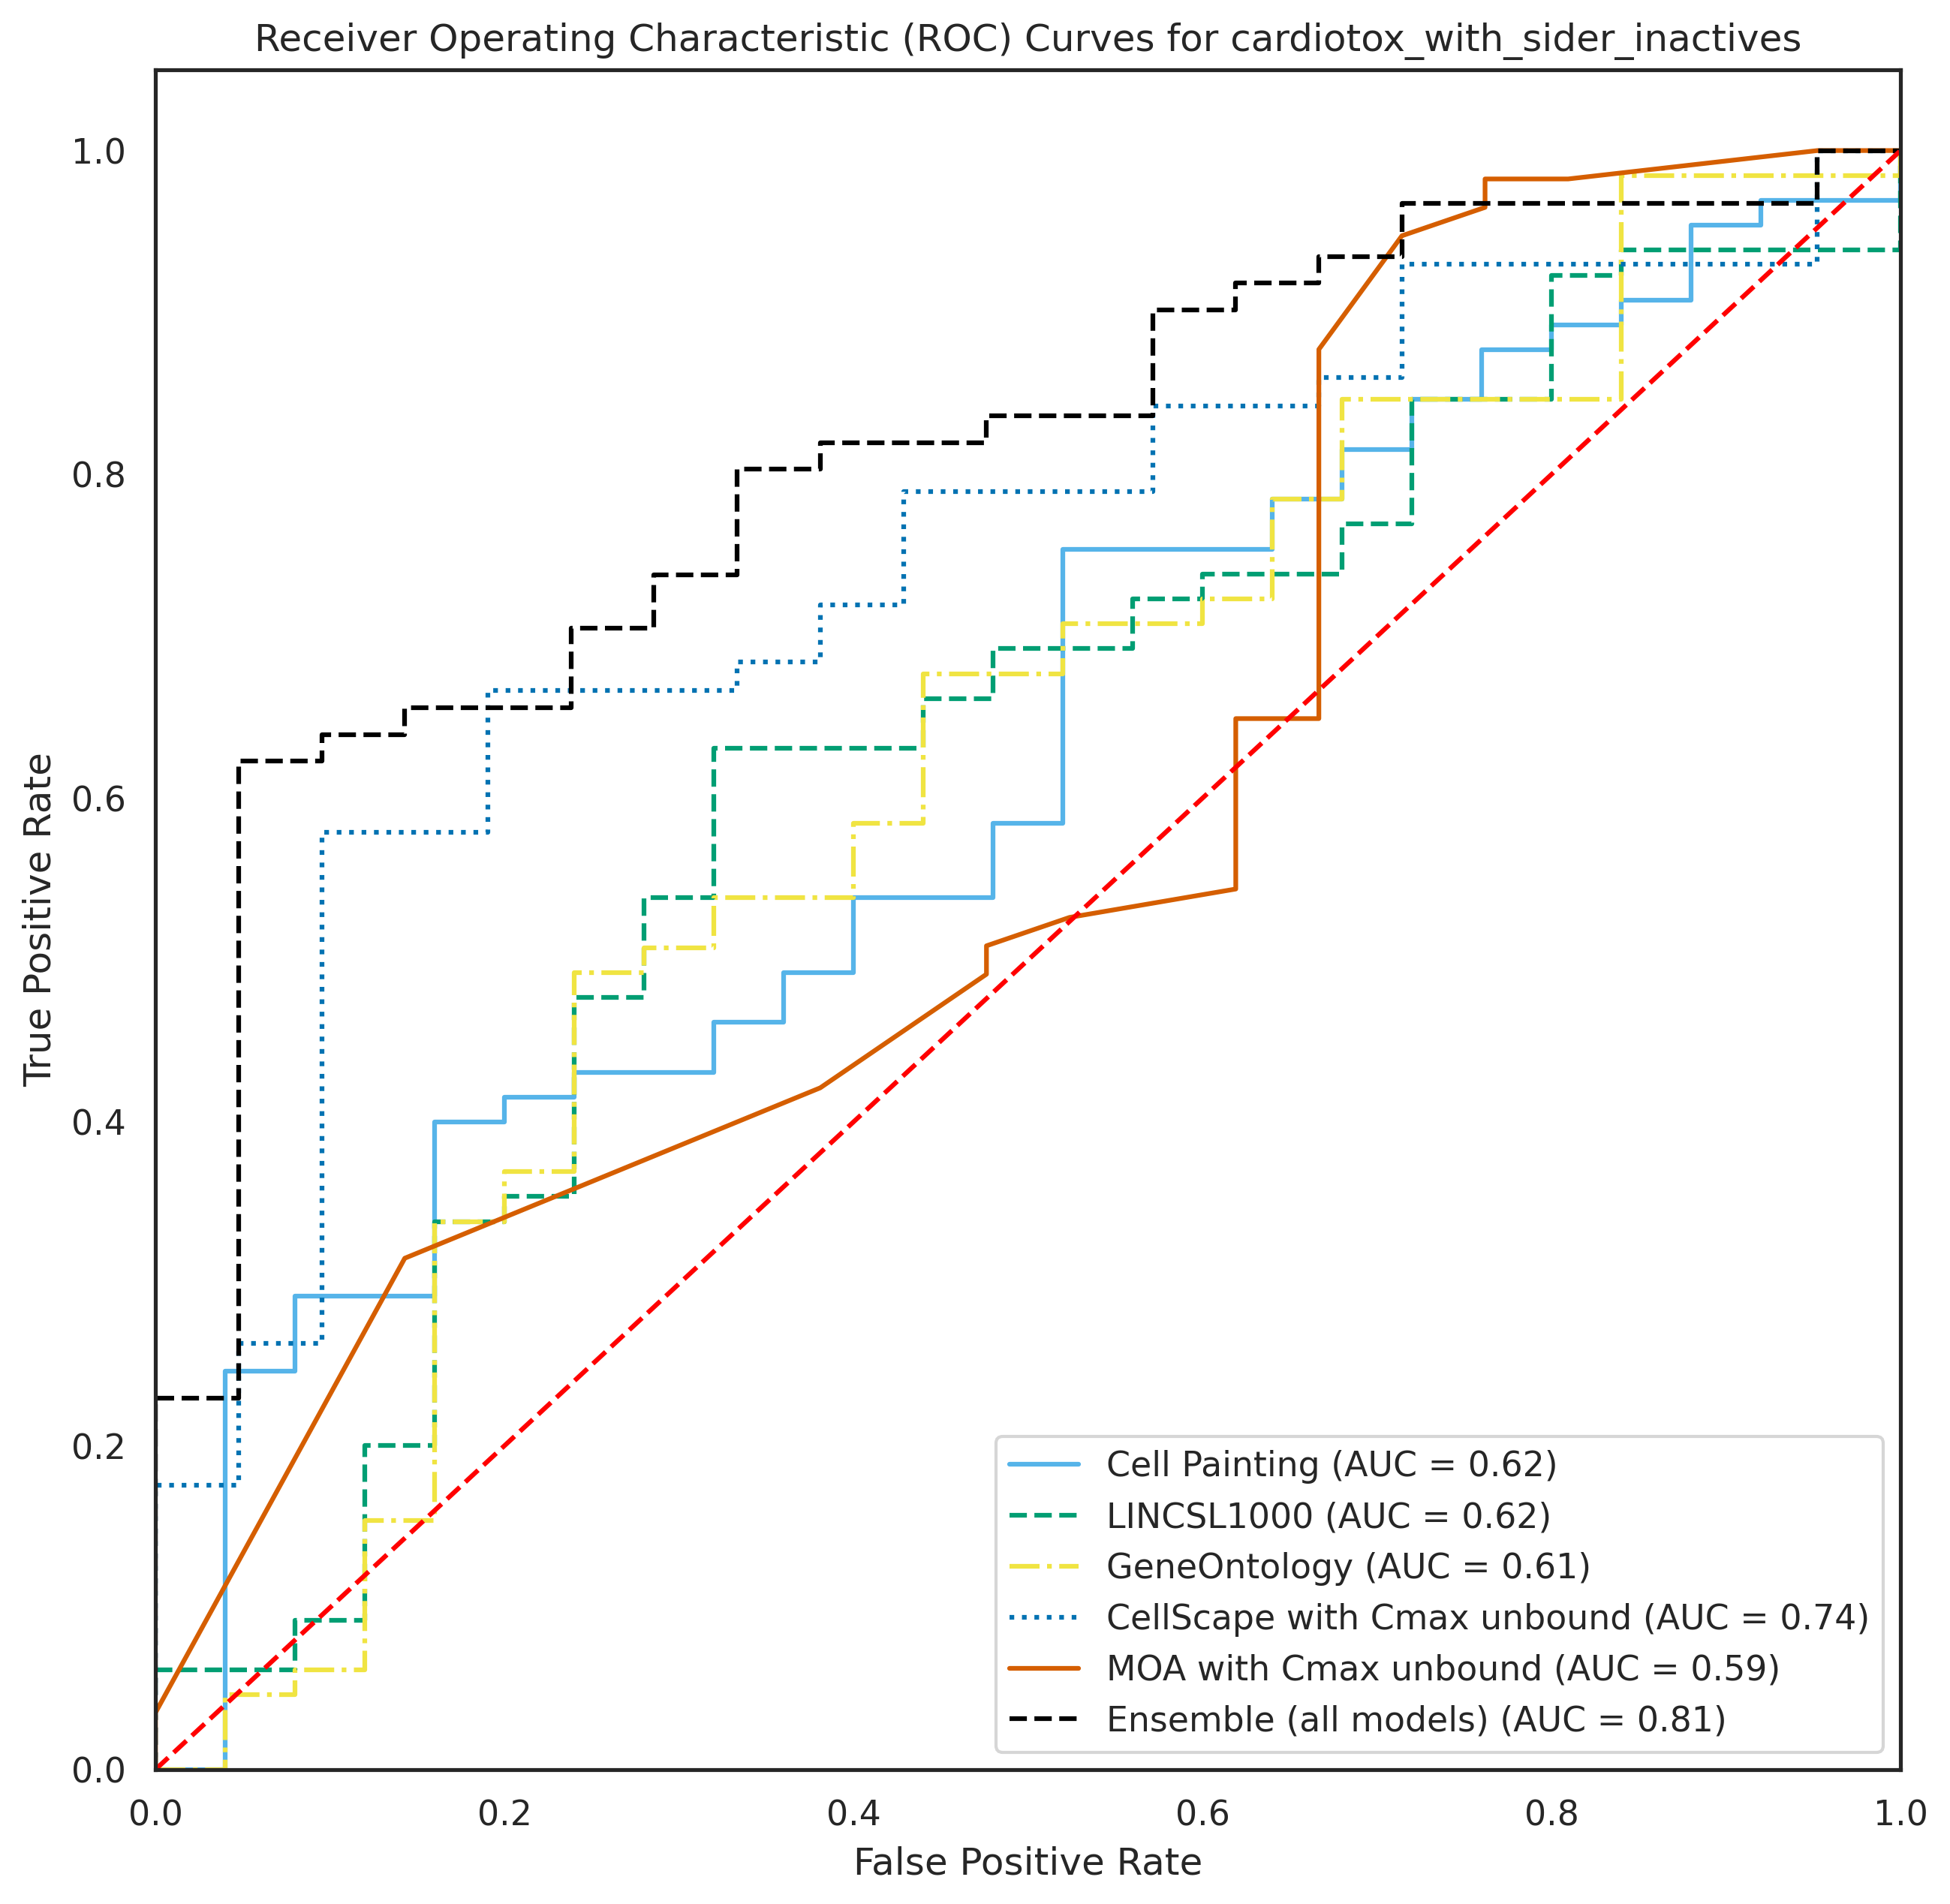

cardiotox_with_sider_all
Cell Painting
90
LINCSL1000
90
GeneOntology
90
CellScape with Cmax unbound
78
MOA with Cmax unbound
78
Ensemble (all models)
82


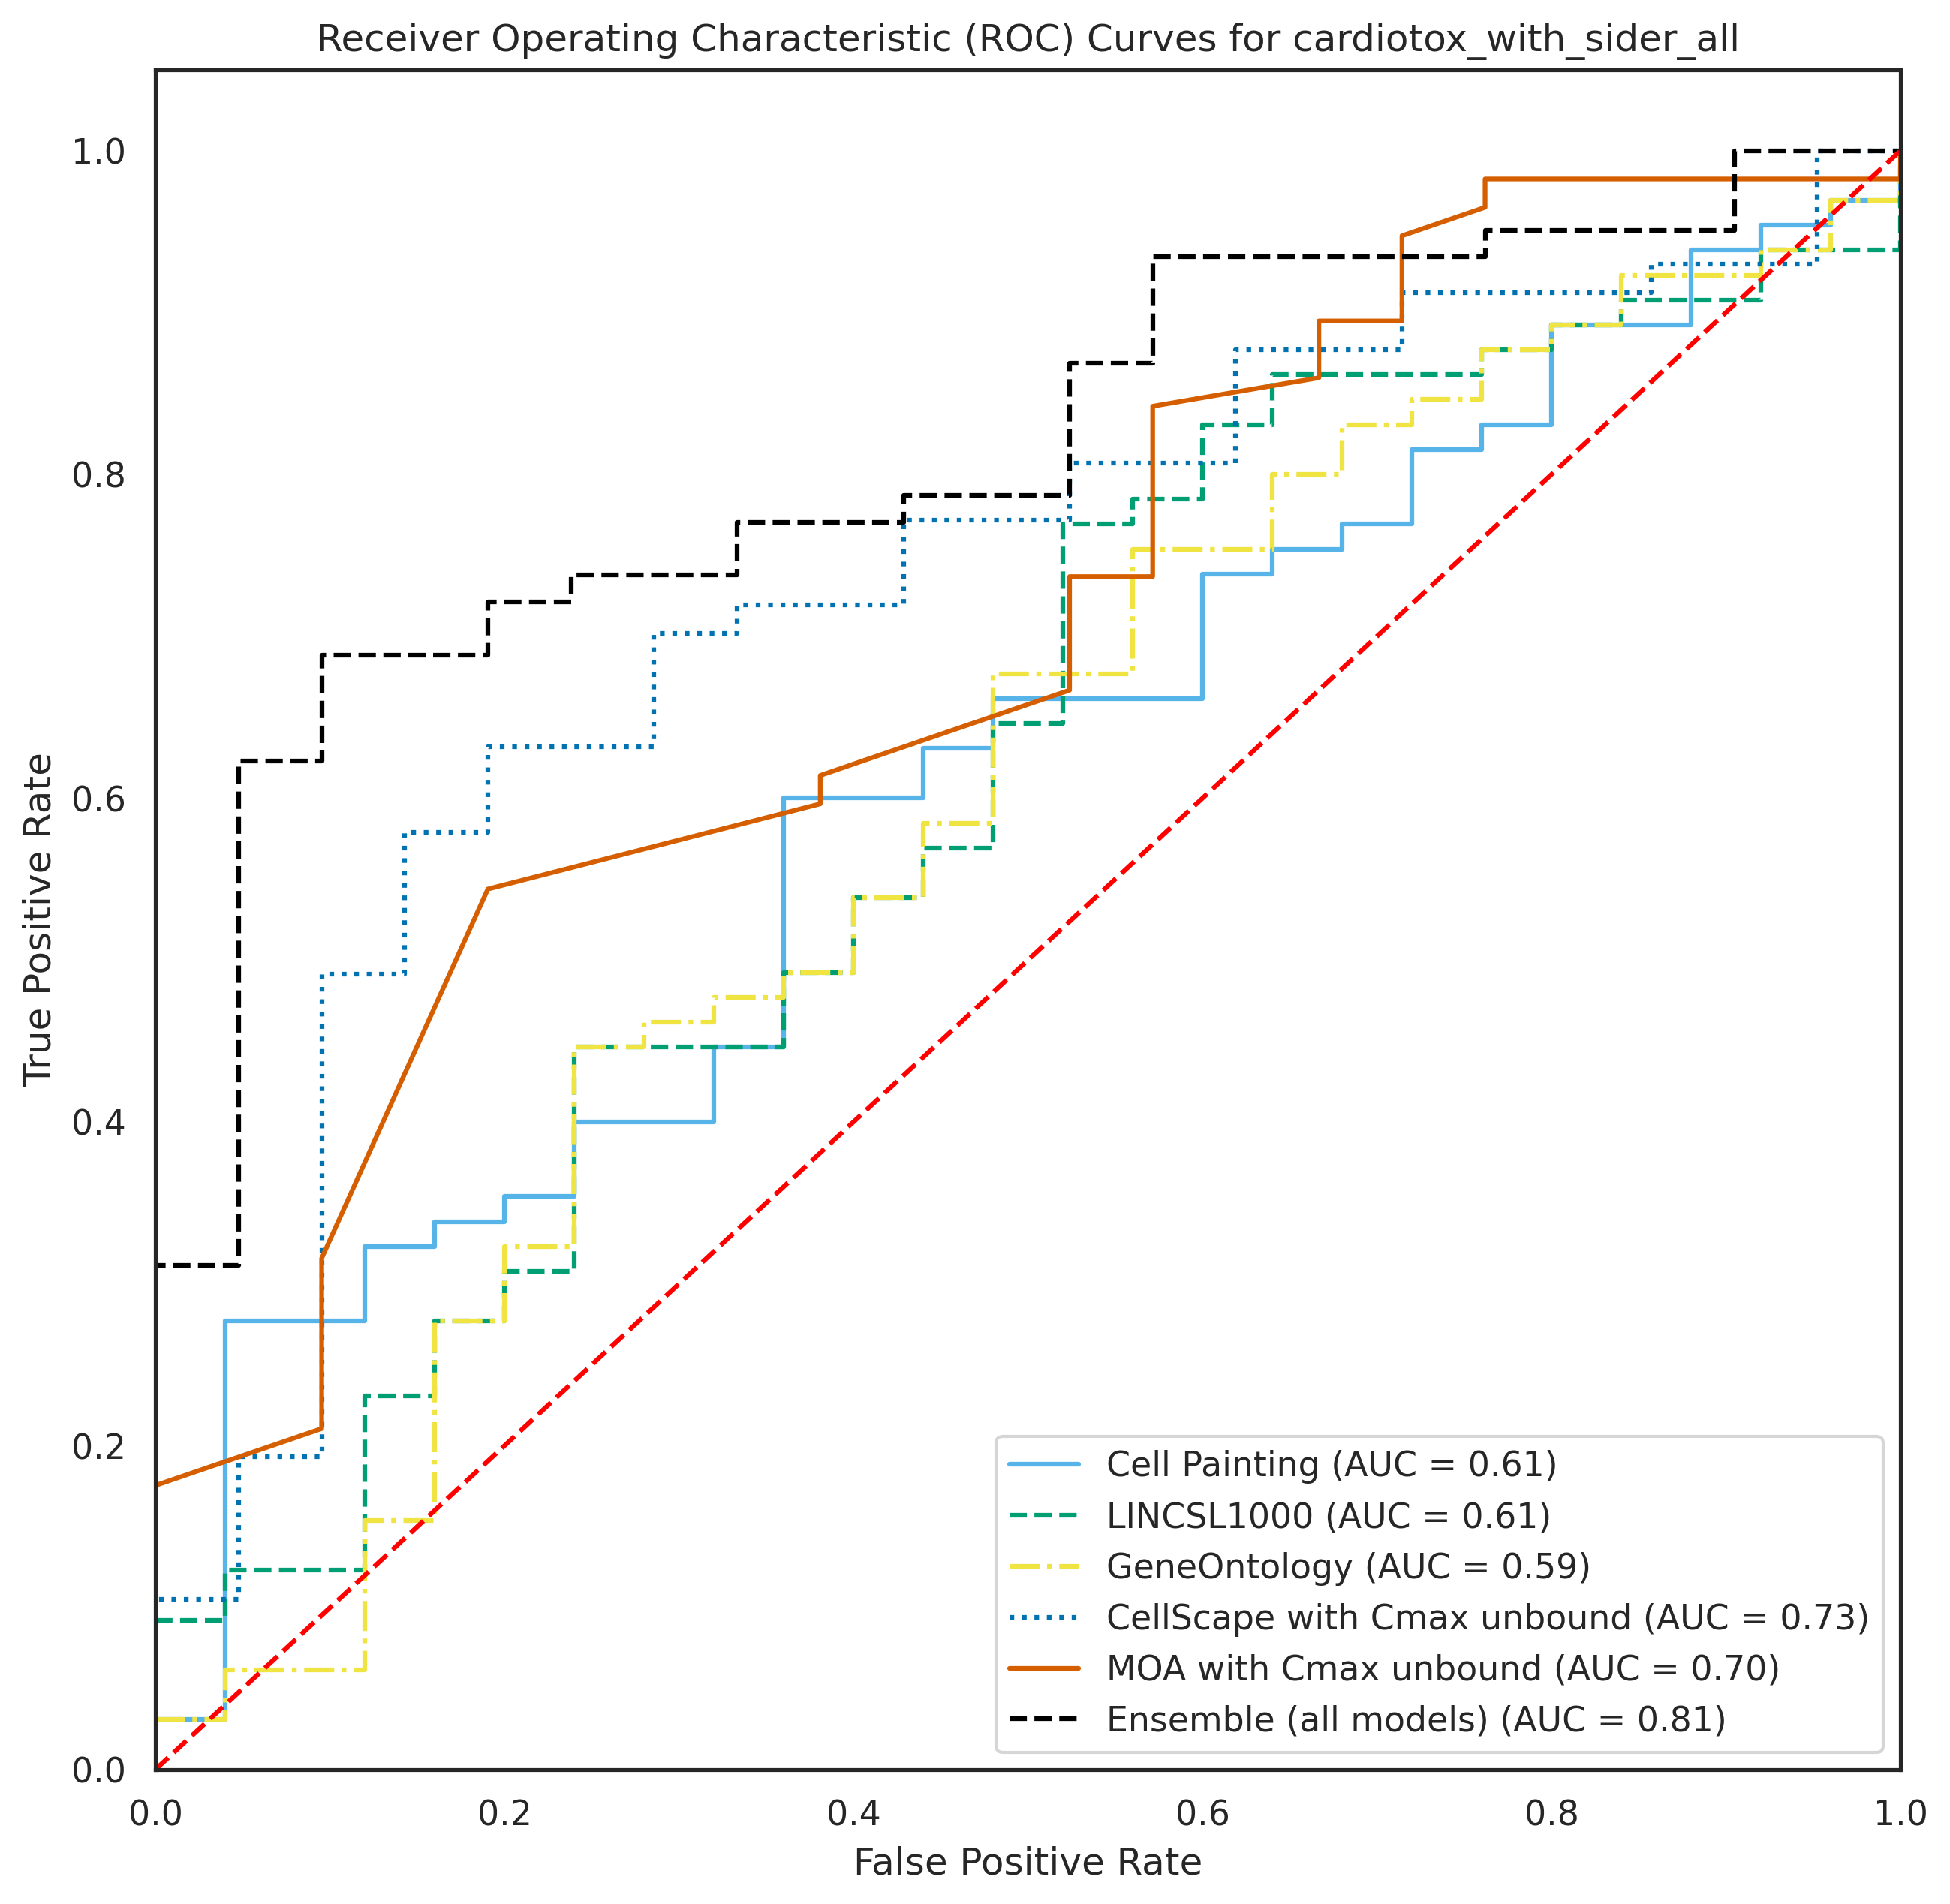

cardiotox_with_sider_actives
Cell Painting
90
LINCSL1000
90
GeneOntology
90
CellScape with Cmax unbound
78
MOA with Cmax unbound
78
Ensemble (all models)
82


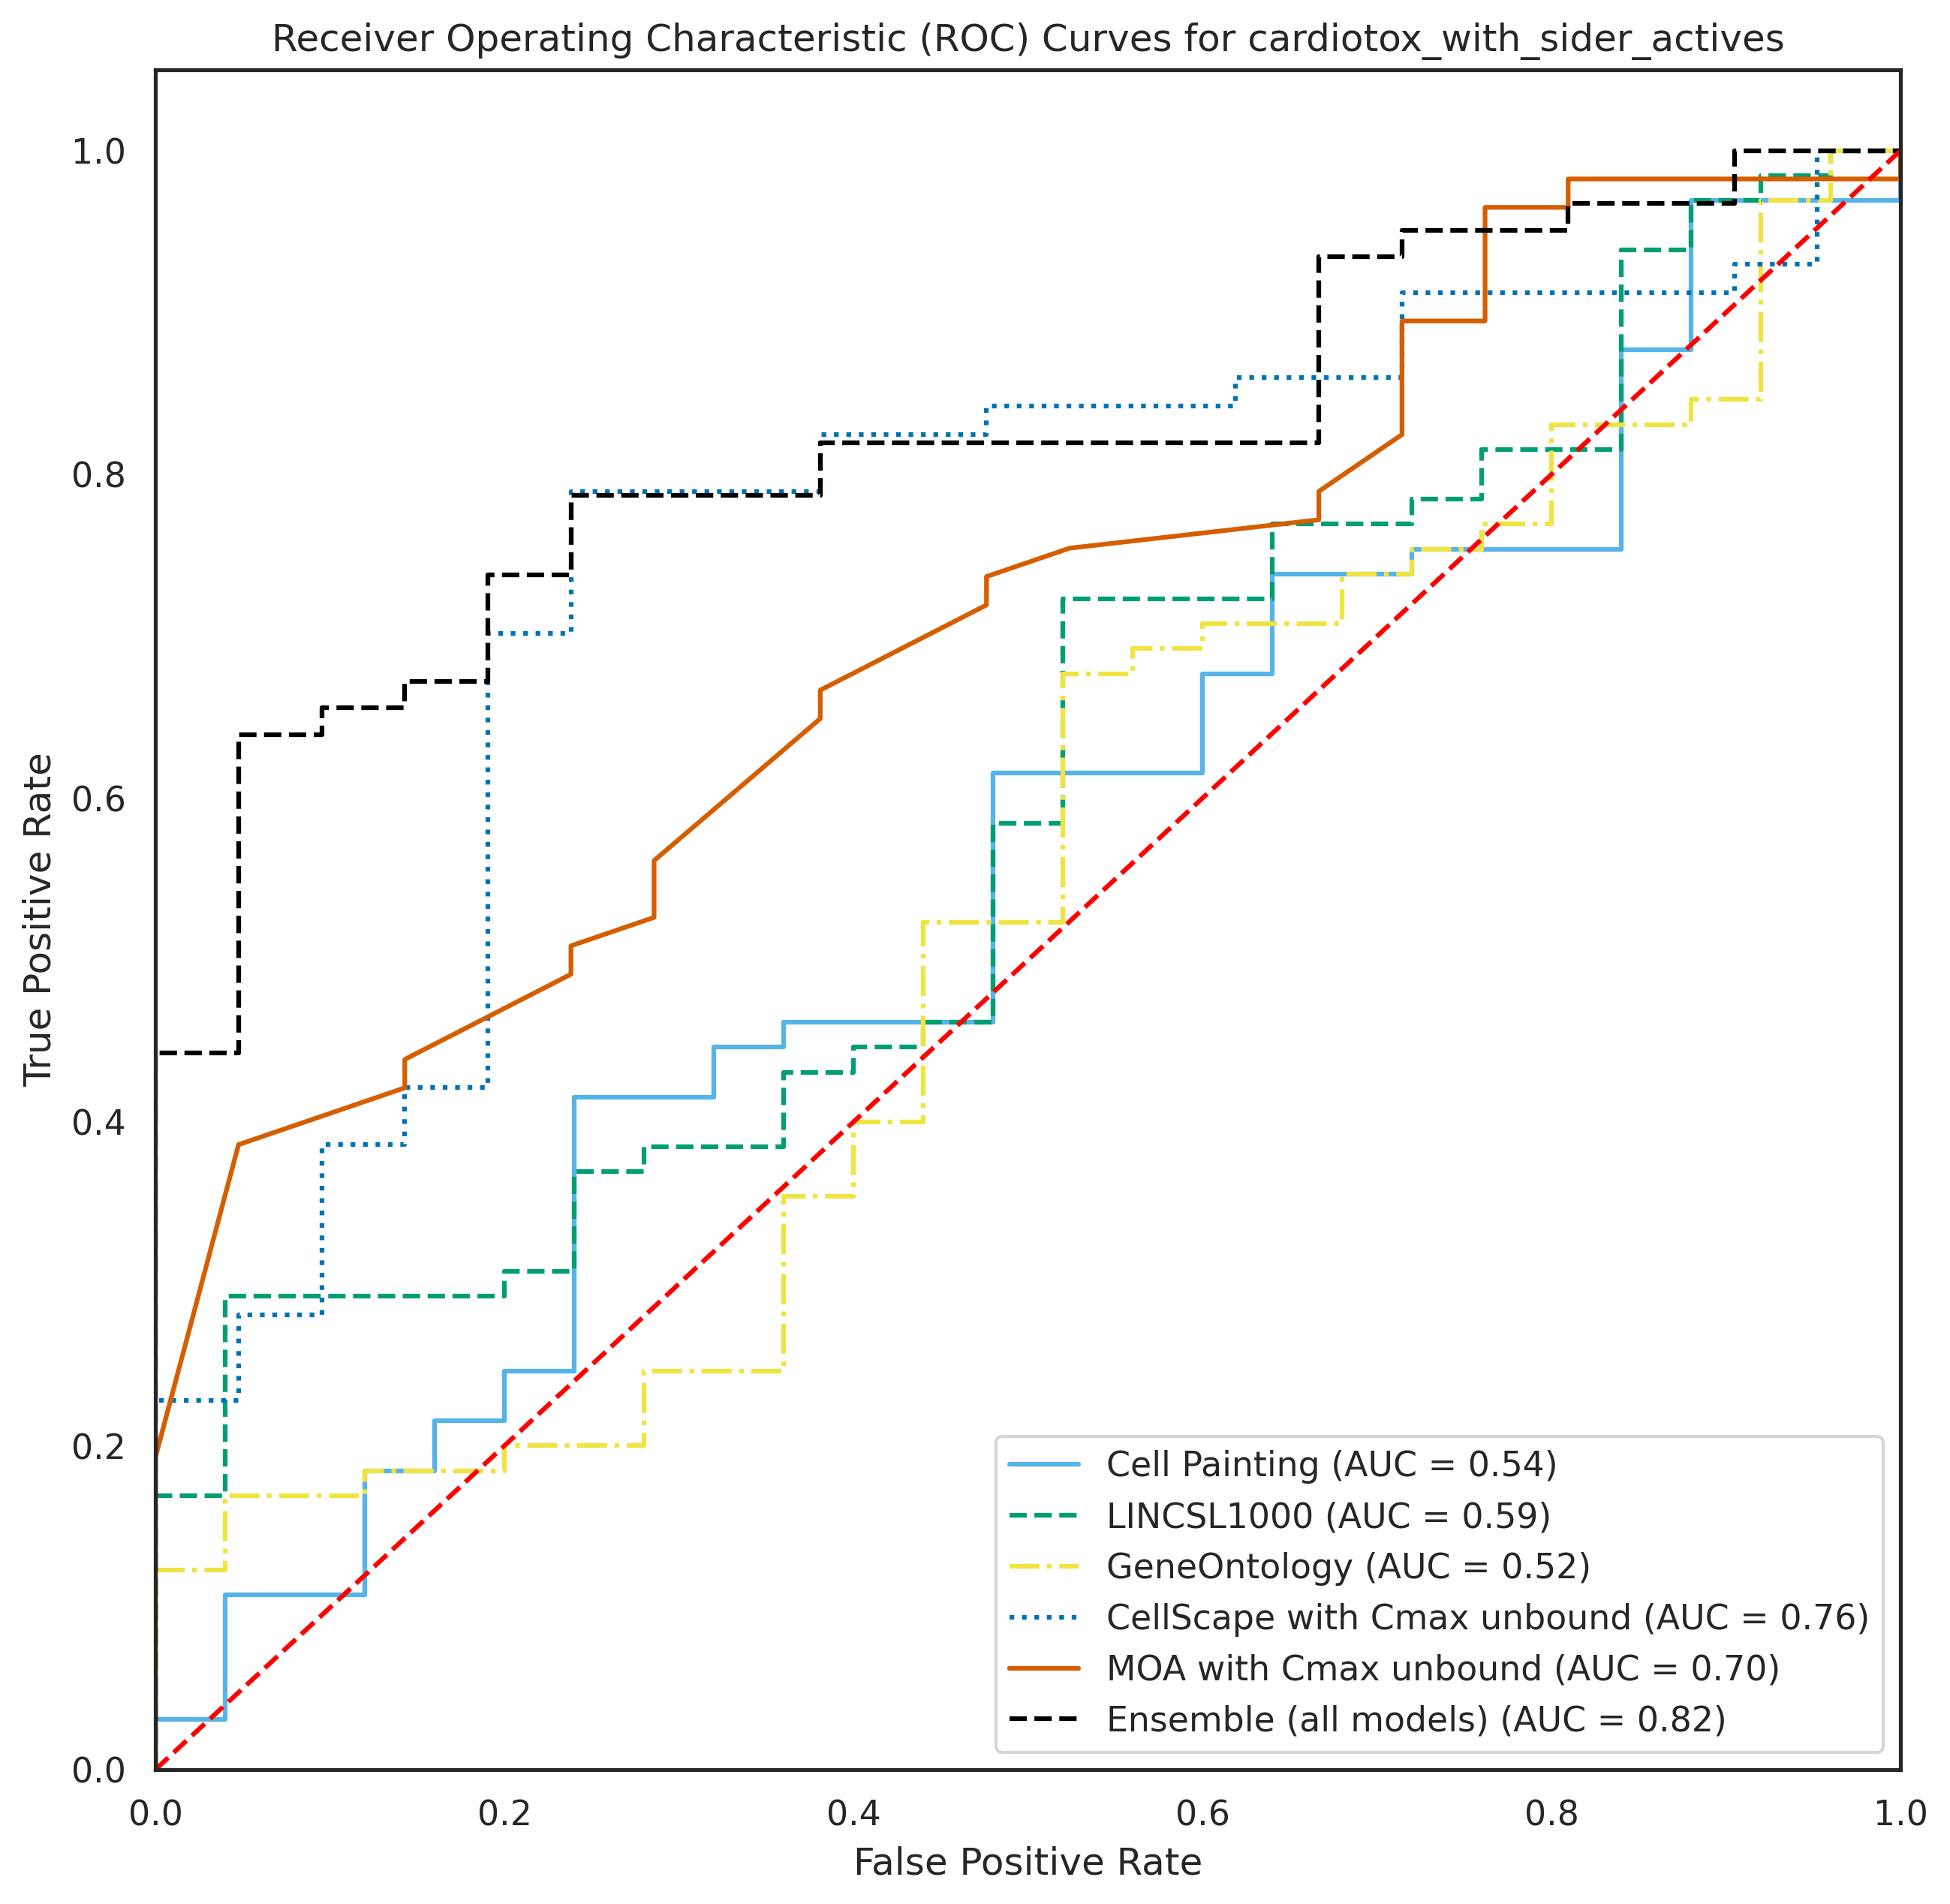

DICTrank
Cell Painting
90
LINCSL1000
90
GeneOntology
90
CellScape with Cmax unbound
78
MOA with Cmax unbound
78
Ensemble (all models)
82


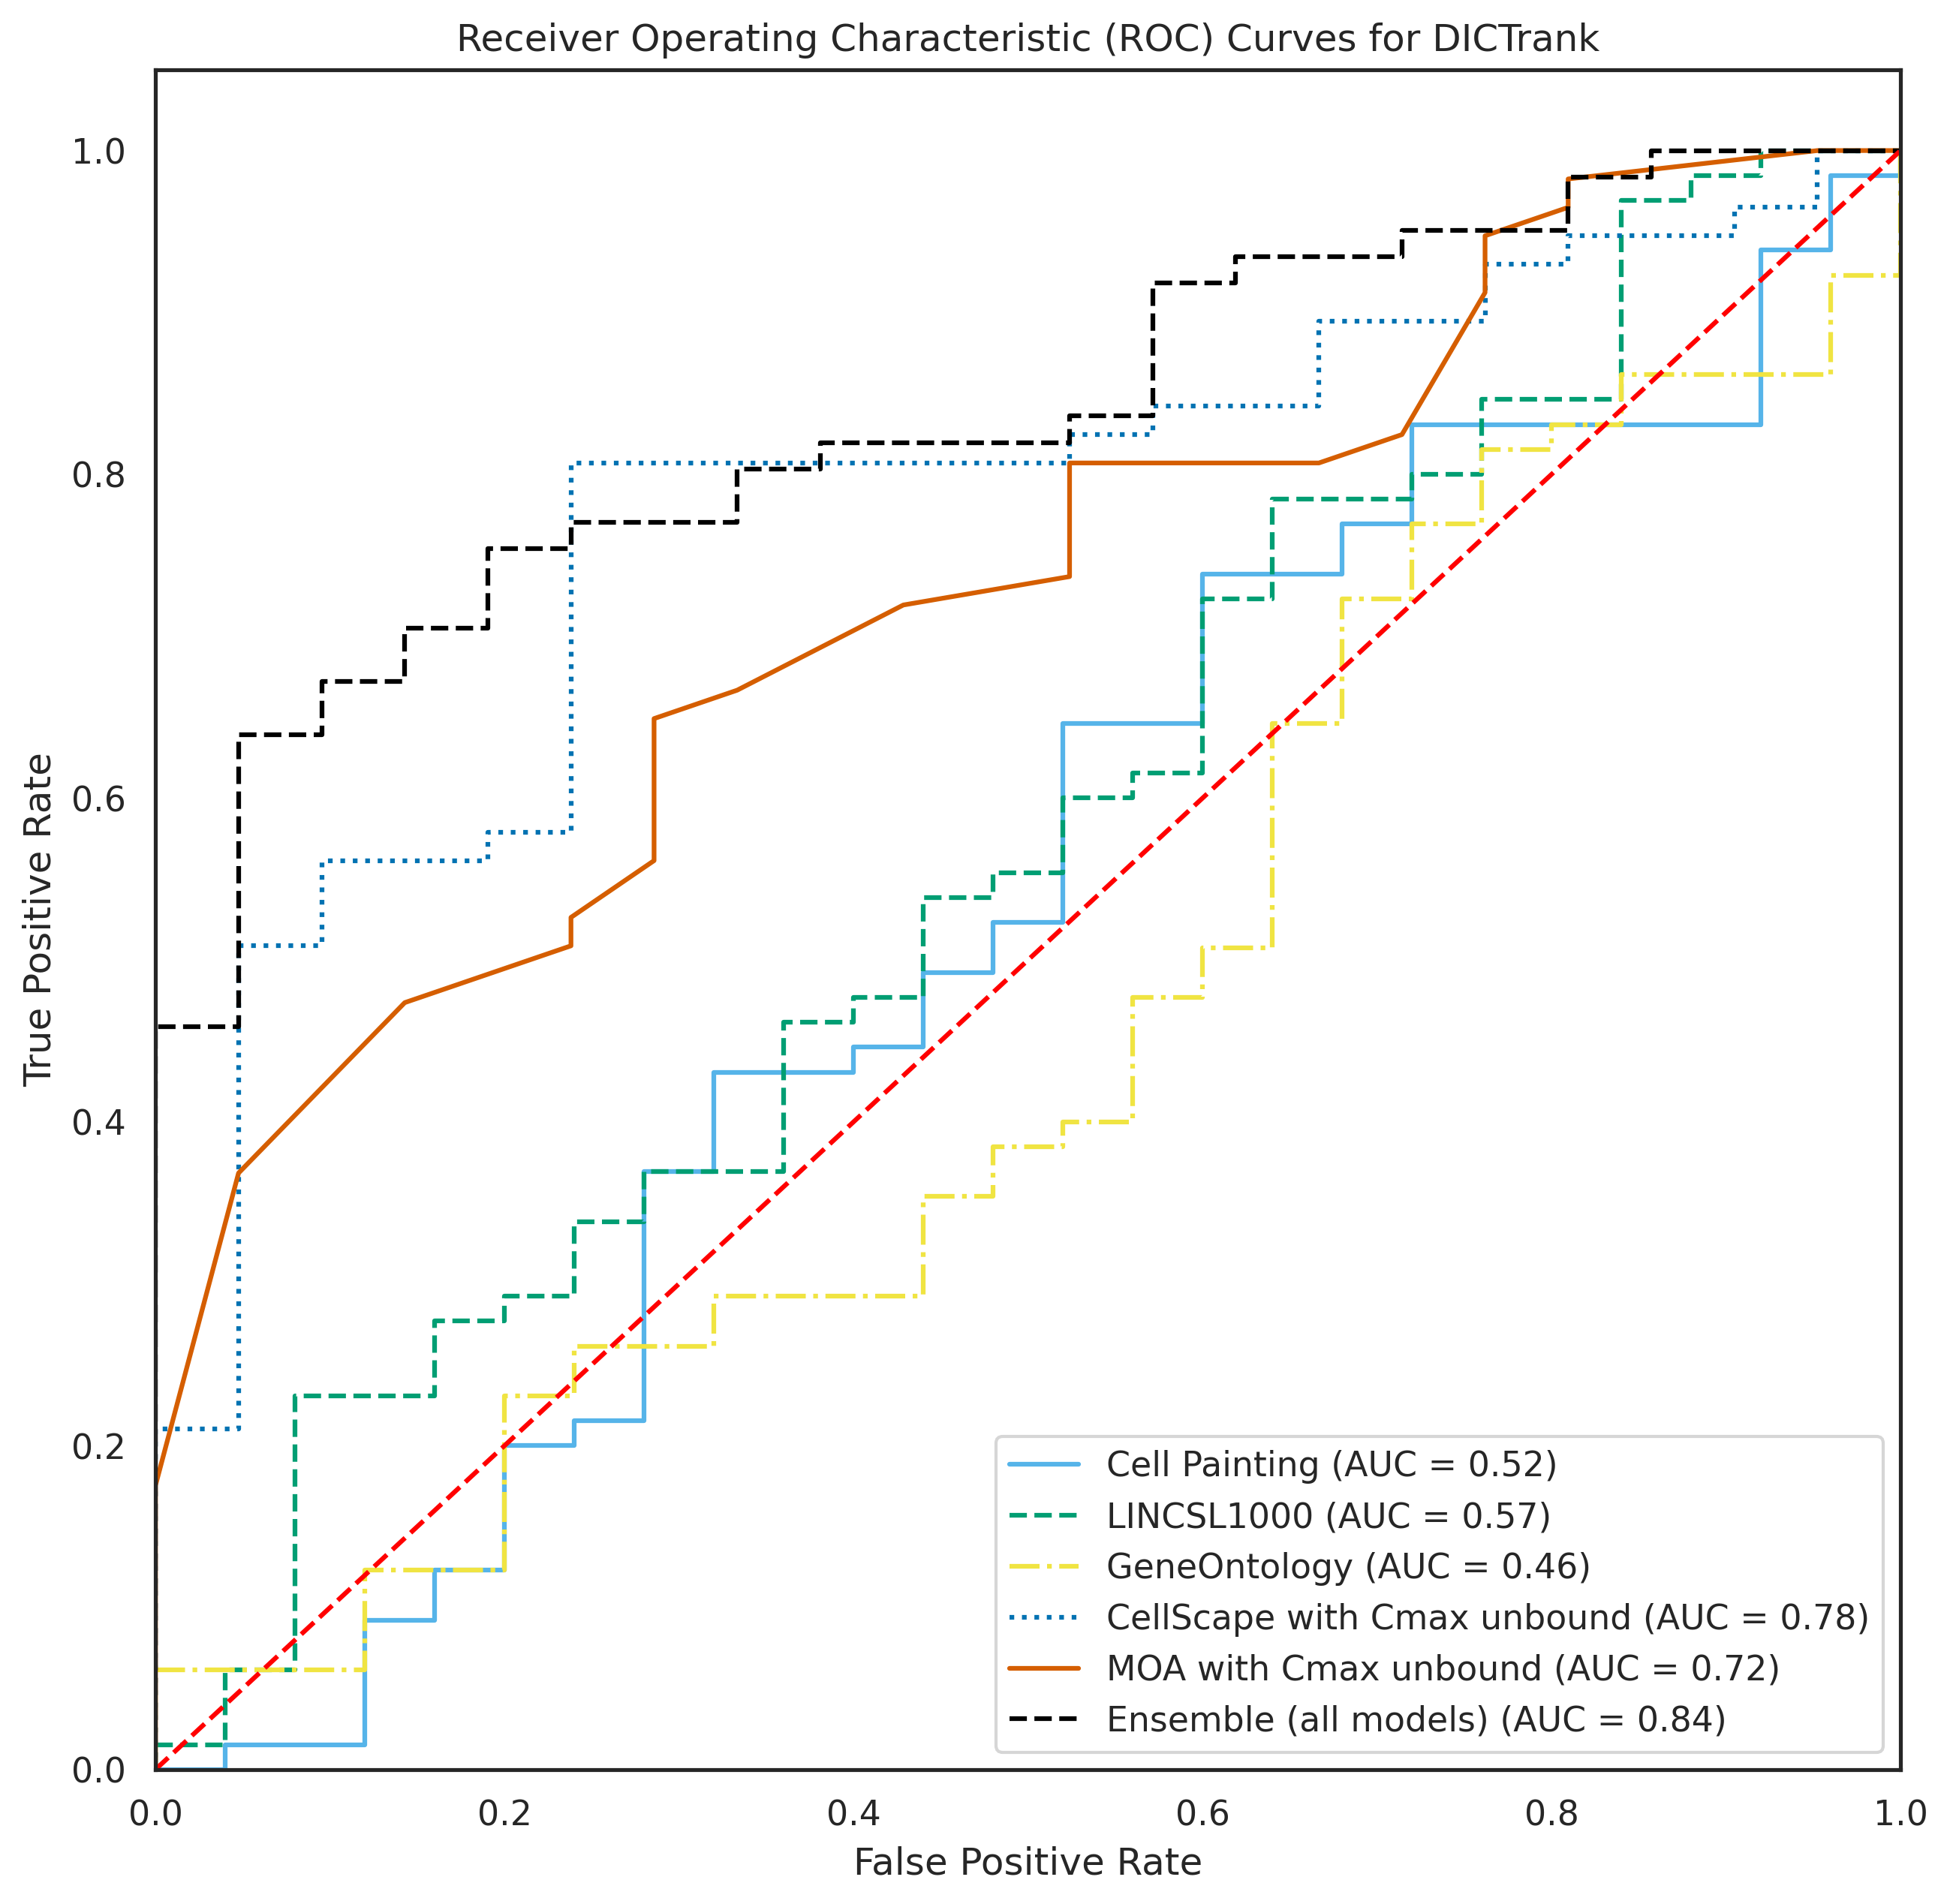

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# Define a colorblind-friendly palette and line styles
palette = ["#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#000000"] 

line_styles = ['solid', 'dashed', 'dashdot', 'dotted']

# Loop through each dataset
for dataset in ['cardiotox_with_sider_inactives',
       'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
       'DICTrank']:
    print(dataset)
    df_dataset = allresults[allresults["Dataset"] == dataset]
    
    plt.figure(figsize=(10, 10), dpi=300) 
    sns.set(style="white")  # Set the style
    
    # For each unique feature in the dataset, plot the AUC curve
    for idx, feature in enumerate(smaller_test_selected_list):
        print(feature)
        df_feature = df_dataset[df_dataset["Features"] == feature]
        print(len(df_feature))
        fpr, tpr, _ = roc_curve(df_feature["True_Value"], df_feature["Probability"])
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{feature} (AUC = {roc_auc:.2f})', 
                 color=palette[idx % len(palette)],
                 linestyle=line_styles[idx % len(line_styles)])
    
    
    # Aesthetics for the plot
    plt.plot([0, 1], [0, 1], linestyle='--', color='red')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curves for {dataset}')
    plt.legend(loc='lower right')
    plt.show()


cardiotox_with_sider_inactives
Structural
90
Mordred
90
MOA
90
CellScape
90
CellScape with Cmax total
90
MOA with Cmax total
90
Ensemble (selected models)
90


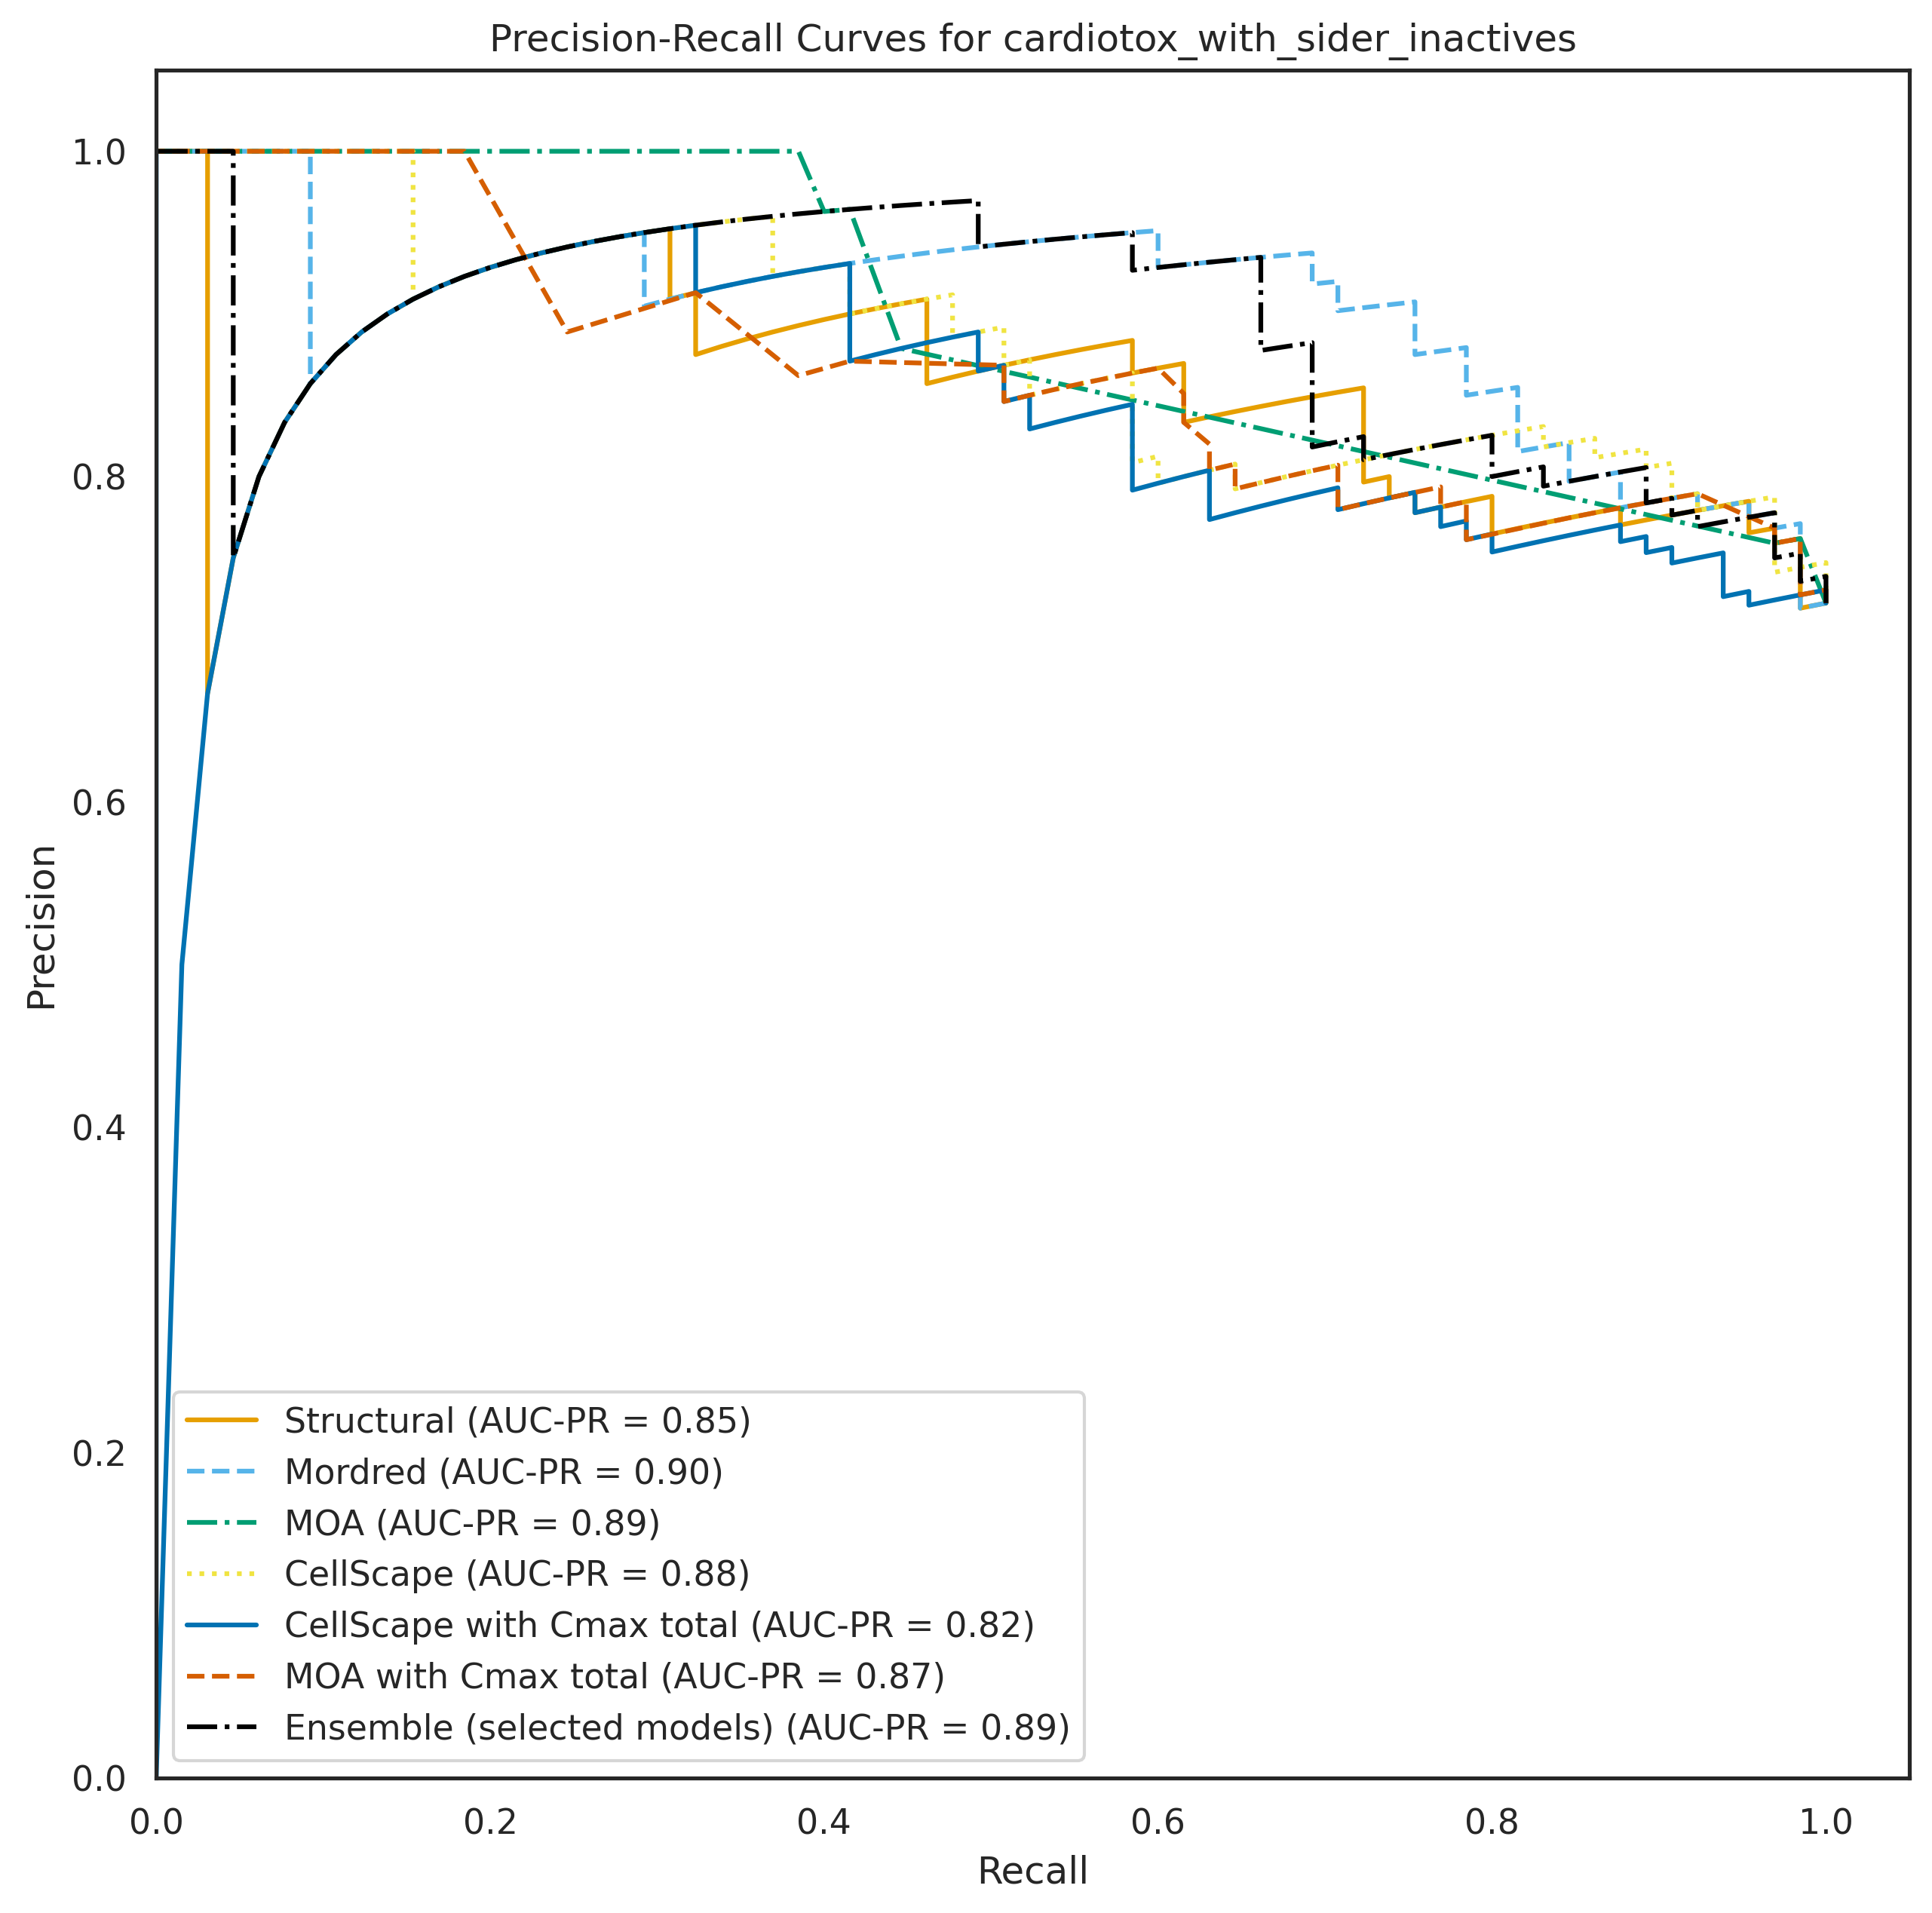

cardiotox_with_sider_all
Structural
90
Mordred
90
MOA
90
CellScape
90
CellScape with Cmax total
90
MOA with Cmax total
90
Ensemble (selected models)
90


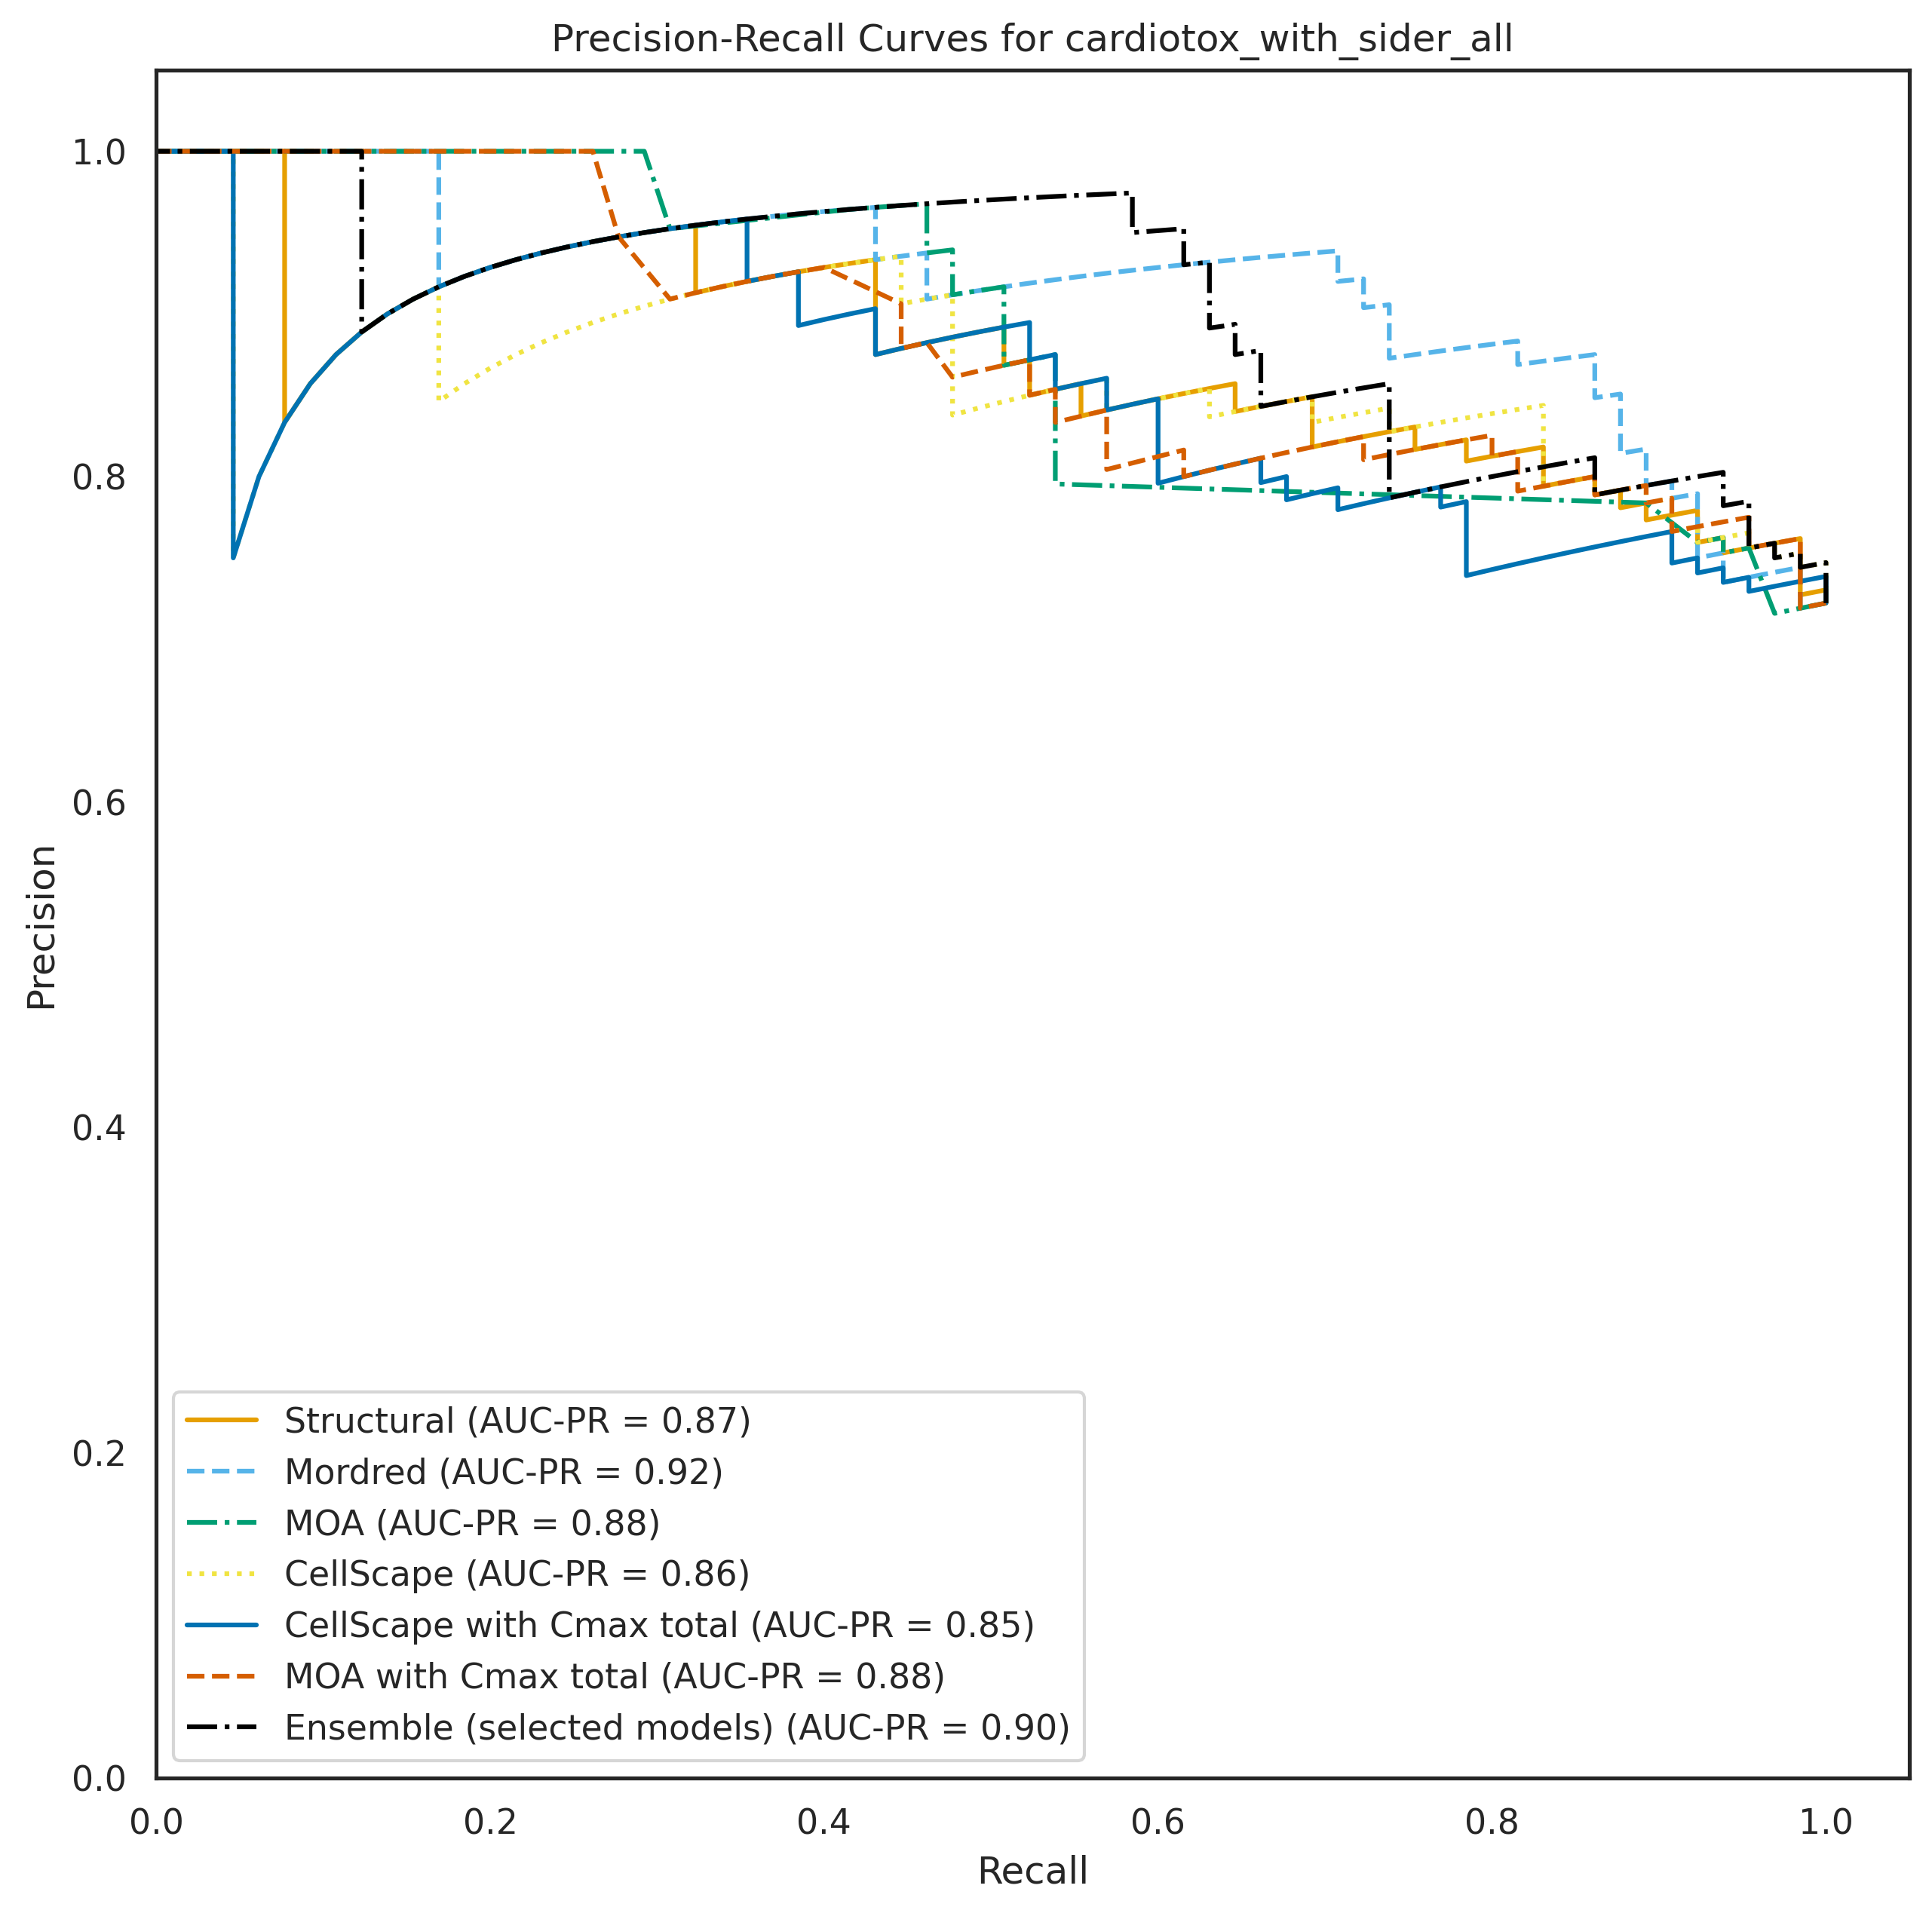

cardiotox_with_sider_actives
Structural
90
Mordred
90
MOA
90
CellScape
90
CellScape with Cmax total
90
MOA with Cmax total
90
Ensemble (selected models)
90


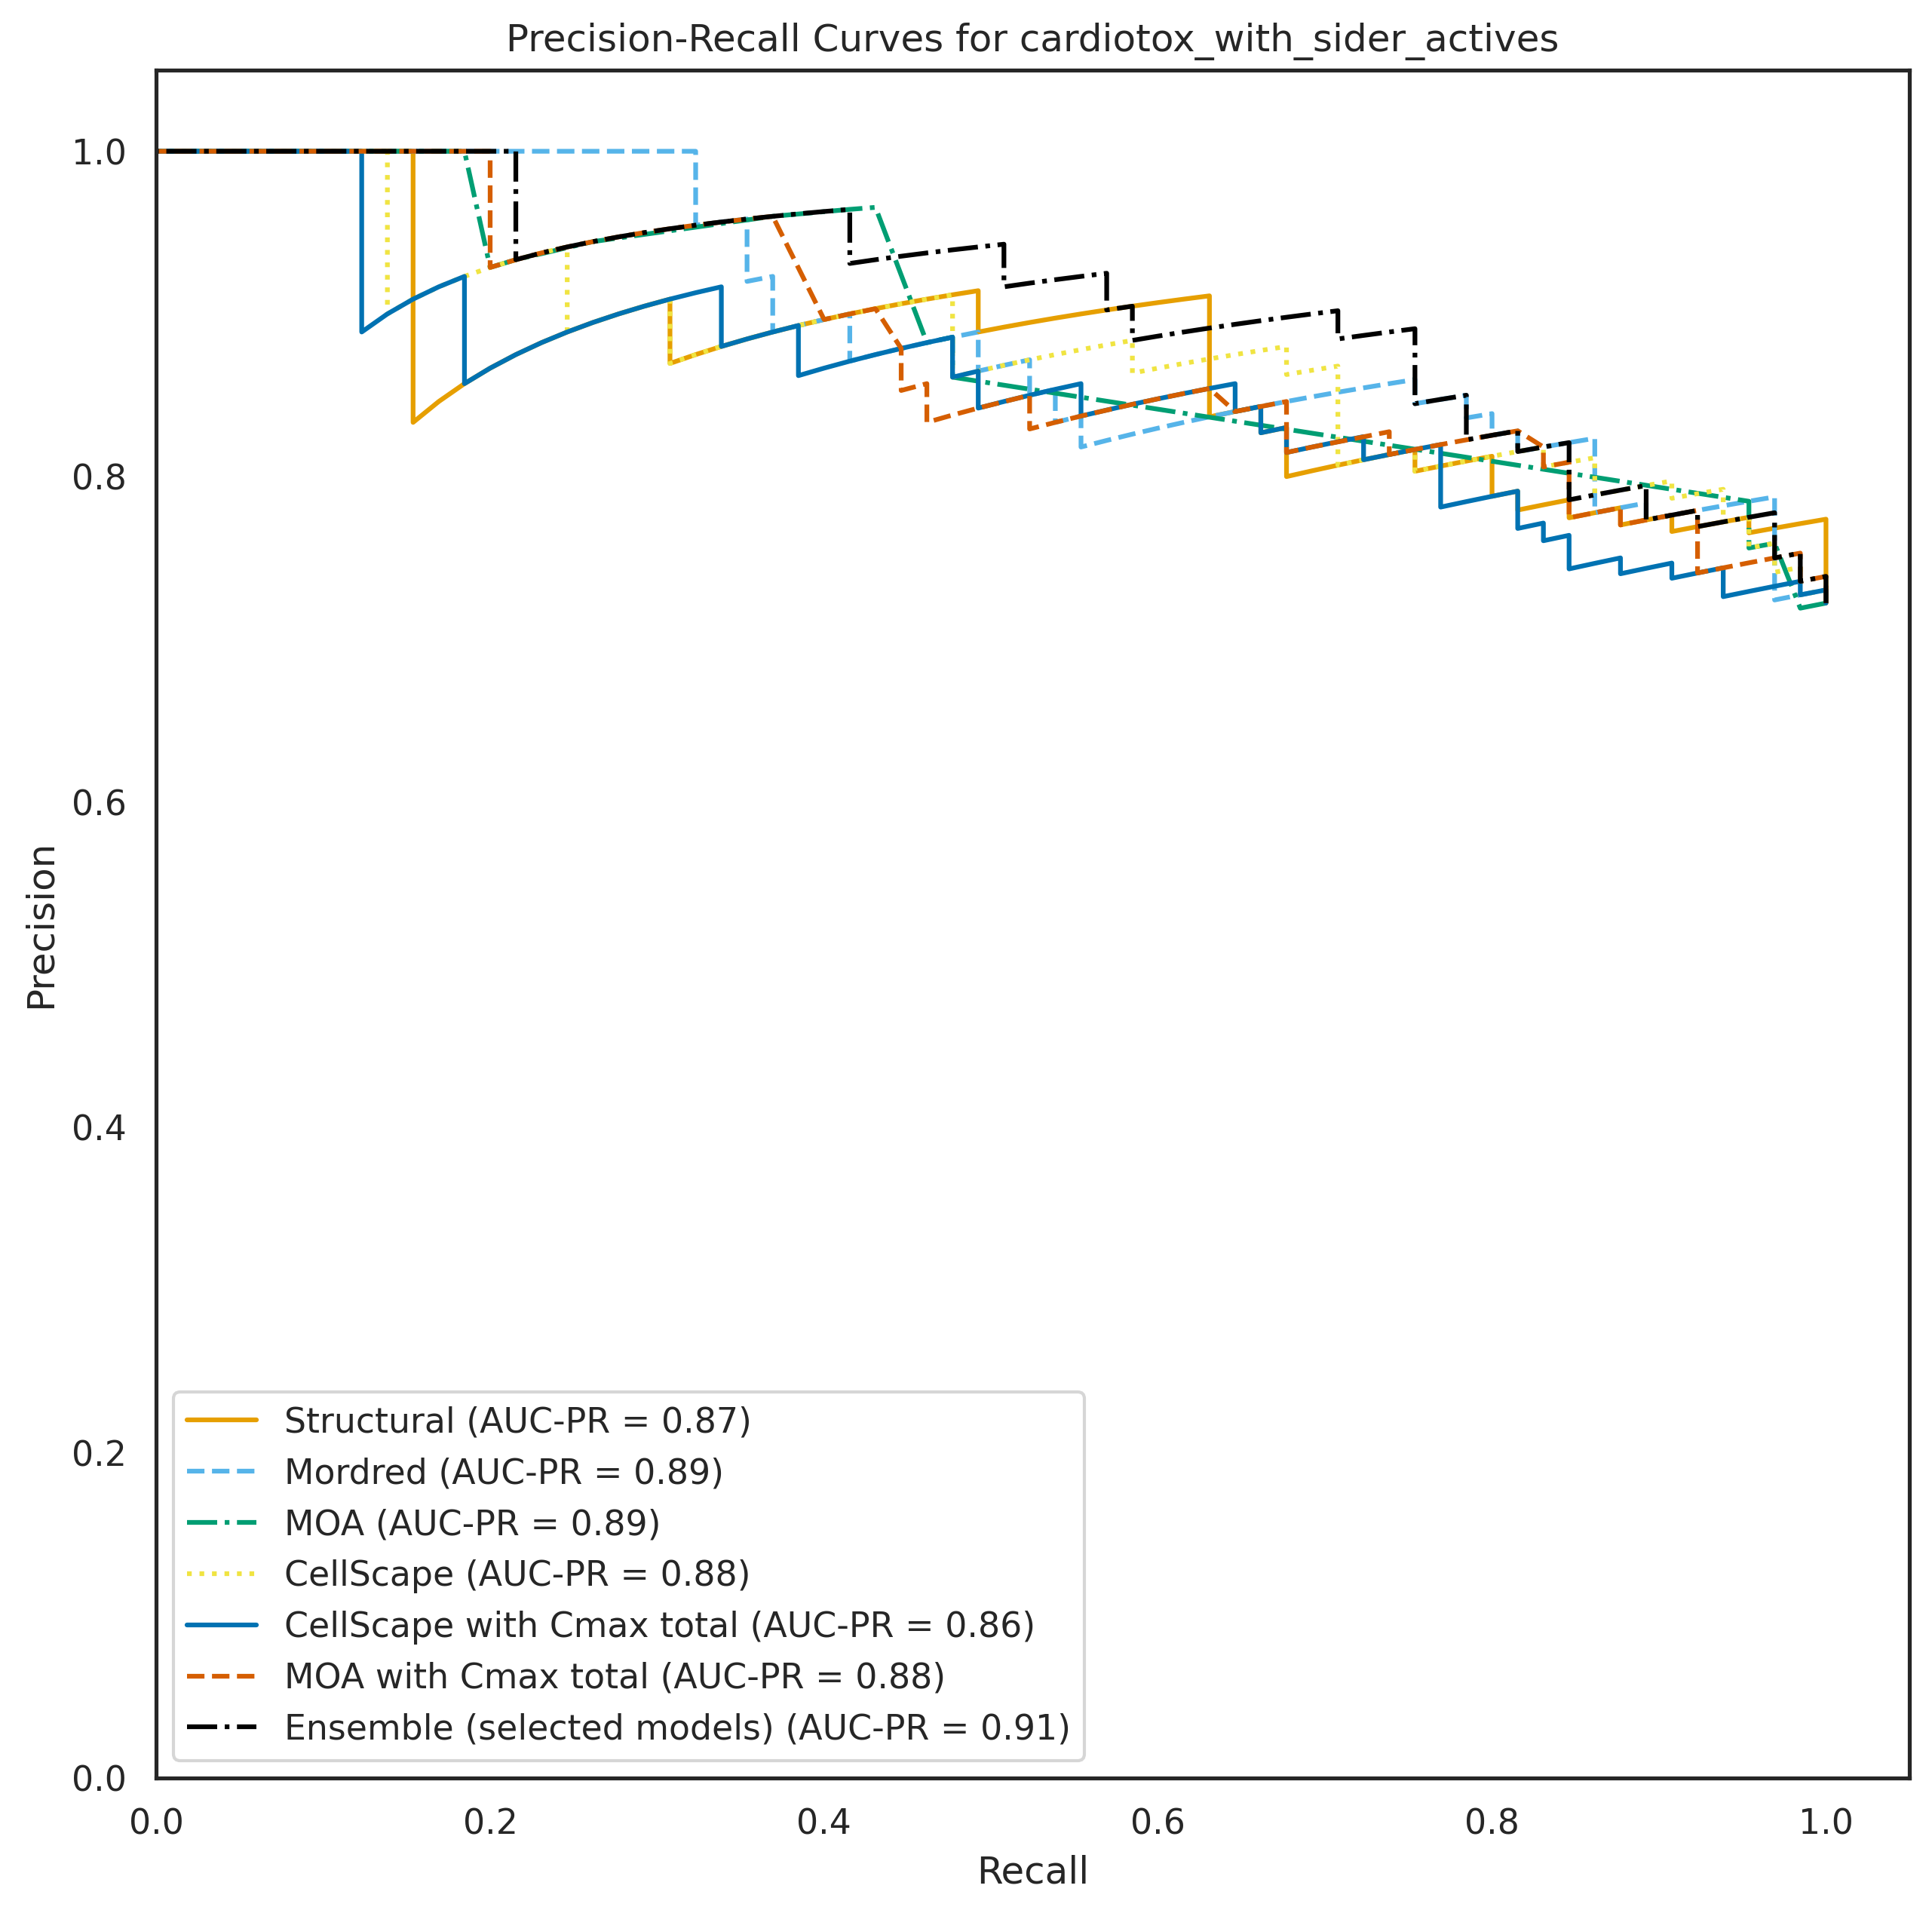

DICTrank
Structural
90
Mordred
90
MOA
90
CellScape
90
CellScape with Cmax total
90
MOA with Cmax total
90
Ensemble (selected models)
90


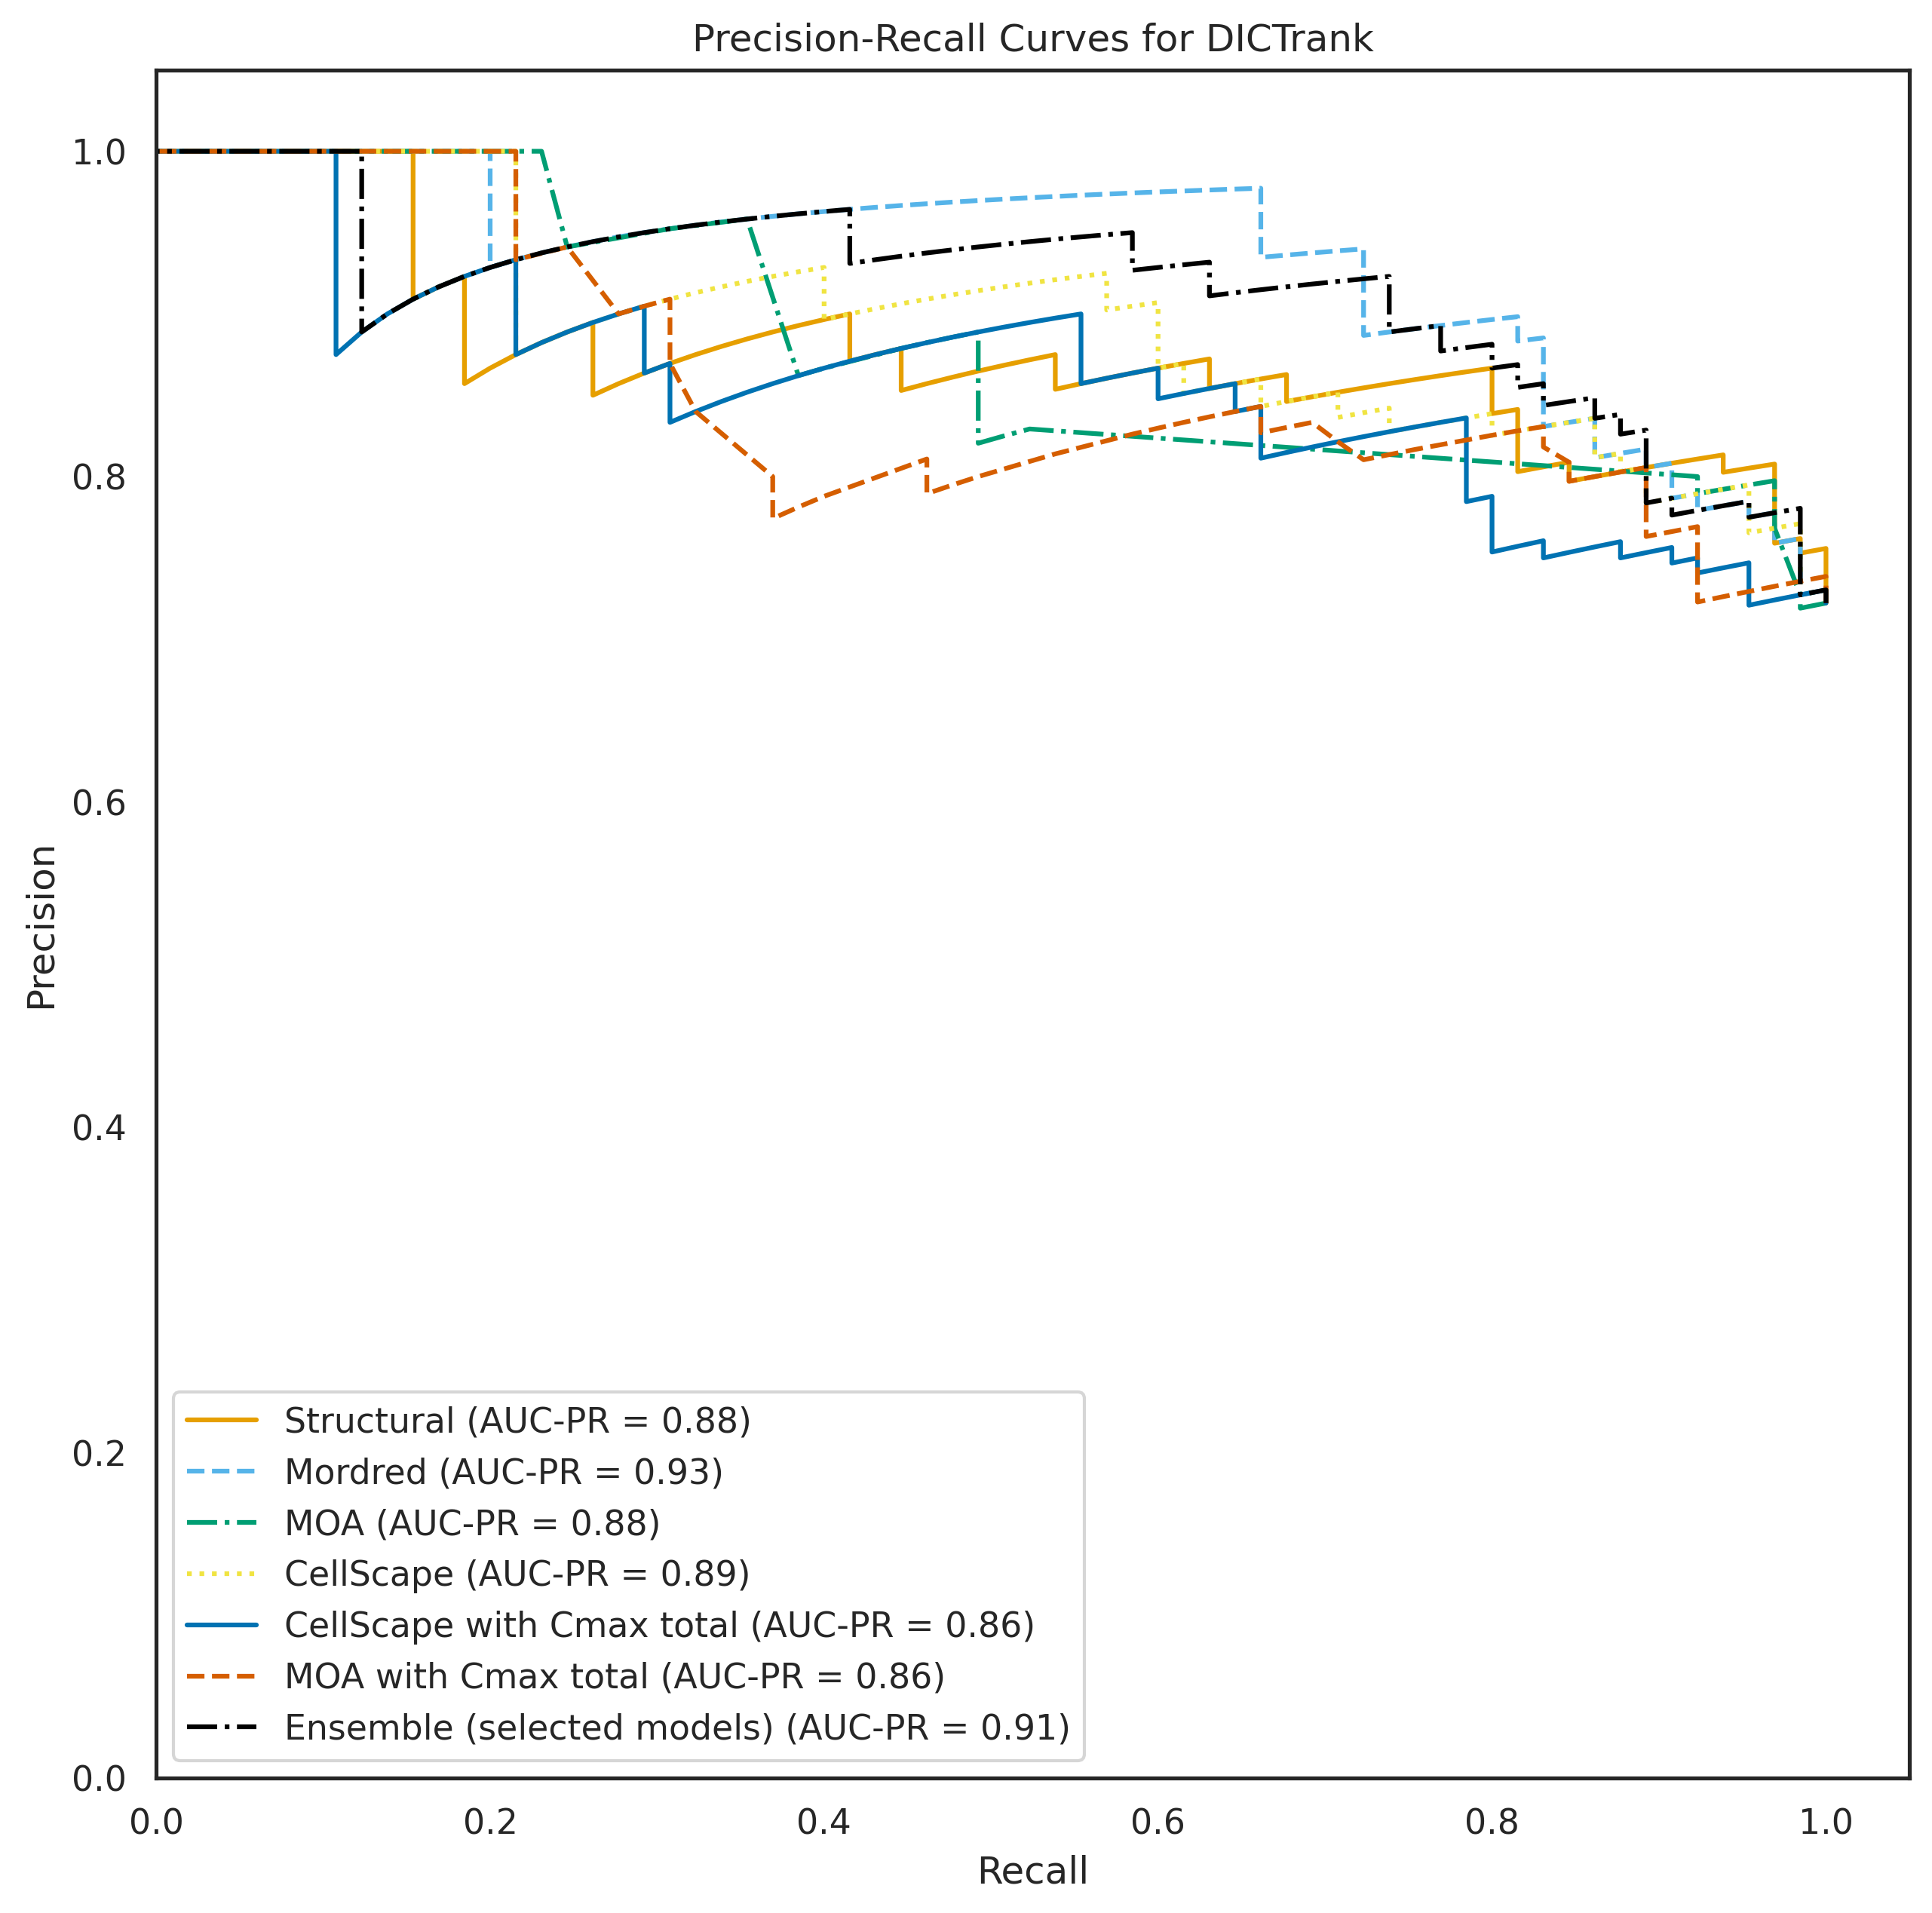

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns

# Define a colorblind-friendly palette and line styles
palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#000000"] 
line_styles = ['solid', 'dashed', 'dashdot', 'dotted']

# Loop through each dataset
for dataset in ['cardiotox_with_sider_inactives',
                'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
                'DICTrank']:
    print(dataset)
    df_dataset = allresults[allresults["Dataset"] == dataset]

    plt.figure(figsize=(10, 10), dpi=300)
    sns.set(style="white")  # Set the style

    # For each unique feature in the dataset, plot the AUC-PR curve
    for idx, feature in enumerate(larger_test_selected_list):
        print(feature)
        df_feature = df_dataset[df_dataset["Features"] == feature]
        print(len(df_feature))
        precision, recall, _ = precision_recall_curve(df_feature["True_Value"], df_feature["Probability"])
        pr_auc = auc(recall, precision)

        plt.plot(recall, precision, label=f'{feature} (AUC-PR = {pr_auc:.2f})',
                 color=palette[idx % len(palette)],
                 linestyle=line_styles[idx % len(line_styles)])

    # Aesthetics for the plot
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curves for {dataset}')
    plt.legend(loc='lower left')
    plt.show()


cardiotox_with_sider_inactives
Cell Painting
90
LINCSL1000
90
GeneOntology
90
CellScape with Cmax unbound
78
MOA with Cmax unbound
78
Ensemble (all models)
82


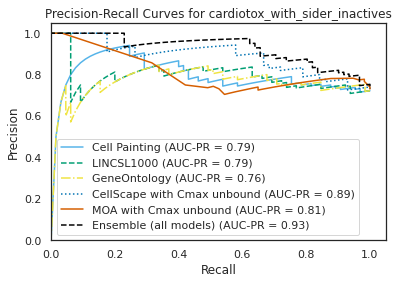

cardiotox_with_sider_all
Cell Painting
90
LINCSL1000
90
GeneOntology
90
CellScape with Cmax unbound
78
MOA with Cmax unbound
78
Ensemble (all models)
82


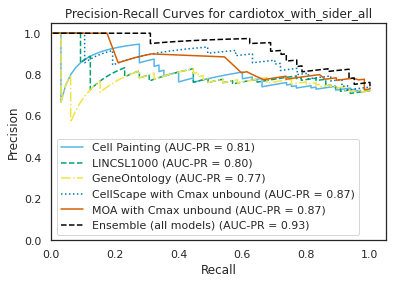

cardiotox_with_sider_actives
Cell Painting
90
LINCSL1000
90
GeneOntology
90
CellScape with Cmax unbound
78
MOA with Cmax unbound
78
Ensemble (all models)
82


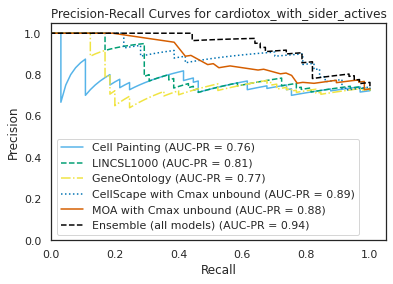

DICTrank
Cell Painting
90
LINCSL1000
90
GeneOntology
90
CellScape with Cmax unbound
78
MOA with Cmax unbound
78
Ensemble (all models)
82


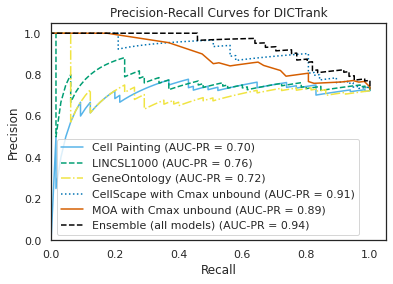

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns

# Define a colorblind-friendly palette and line styles
palette = ["#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#000000"] 

line_styles = ['solid', 'dashed', 'dashdot', 'dotted']

# Loop through each dataset
for dataset in ['cardiotox_with_sider_inactives',
                'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
                'DICTrank']:
    print(dataset)
    df_dataset = allresults[allresults["Dataset"] == dataset]

    #plt.figure(figsize=(10, 10), dpi=300)
    sns.set(style="white")  # Set the style

    # For each unique feature in the dataset, plot the AUC-PR curve
    for idx, feature in enumerate(smaller_test_selected_list):
        print(feature)
        df_feature = df_dataset[df_dataset["Features"] == feature]
        print(len(df_feature))
        precision, recall, _ = precision_recall_curve(df_feature["True_Value"], df_feature["Probability"])
        pr_auc = auc(recall, precision)

        plt.plot(recall, precision, label=f'{feature} (AUC-PR = {pr_auc:.2f})',
                 color=palette[idx % len(palette)],
                 linestyle=line_styles[idx % len(line_styles)])
        

    # Aesthetics for the plot
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curves for {dataset}')
    plt.legend(loc='lower left')
    plt.show()


sider_cardiacdisorders
Structural
133


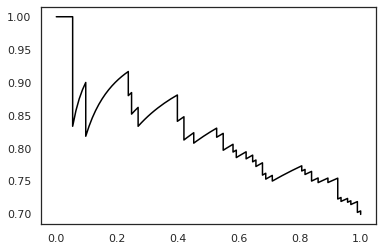

Mordred
133


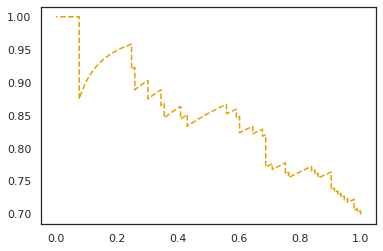

Cell Painting
52


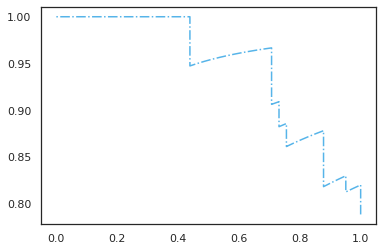

LINCSL1000
86


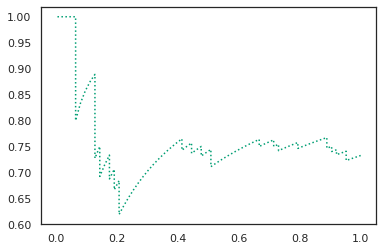

GeneOntology
86


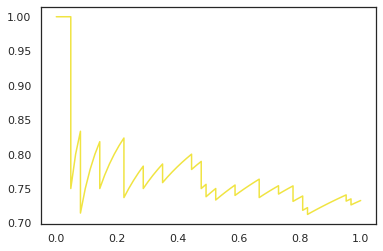

CellScape
133


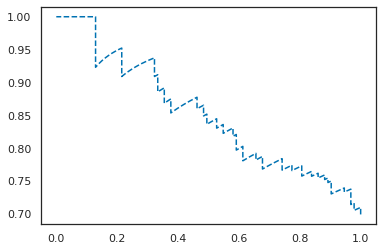

MOA
111


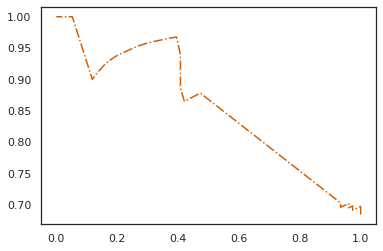

Ensemble (all models)
133


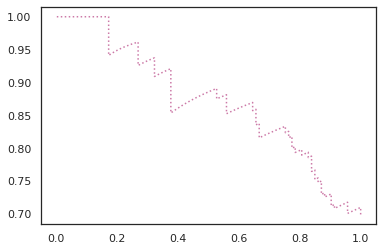

Ensemble (selected models)
133


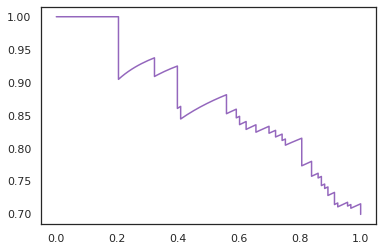

CellScape with Cmax unbound
36


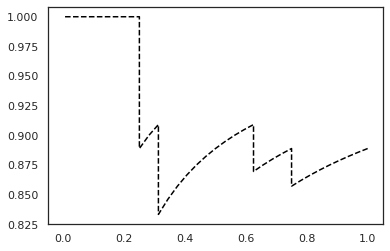

CellScape with Cmax total
51


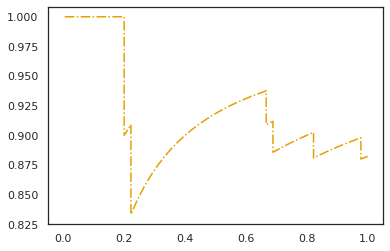

MOA with Cmax unbound
34


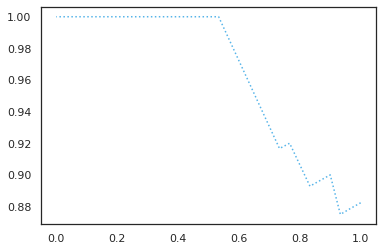

MOA with Cmax total
46


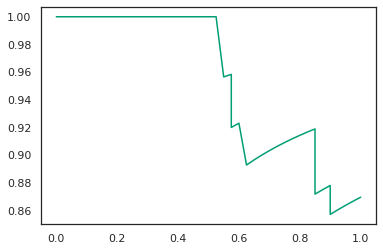

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


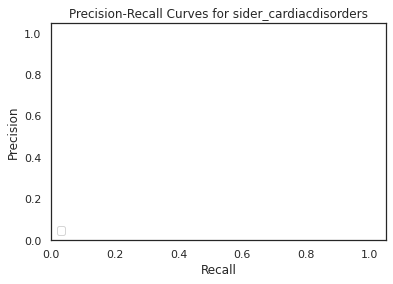

cardiotox_with_sider_inactives
Ensemble (all models)
82


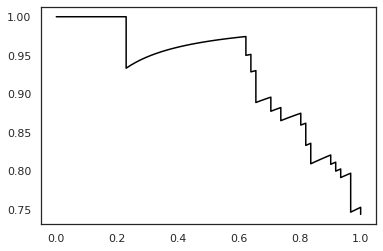

Structural
90


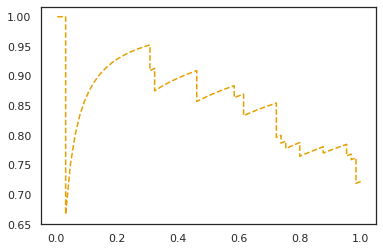

Mordred
90


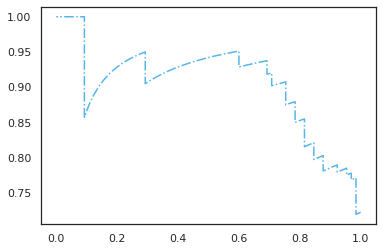

Cell Painting
90


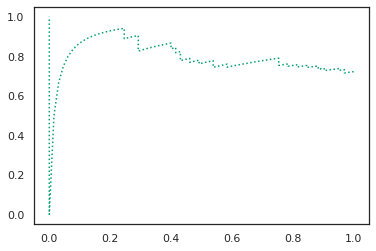

LINCSL1000
90


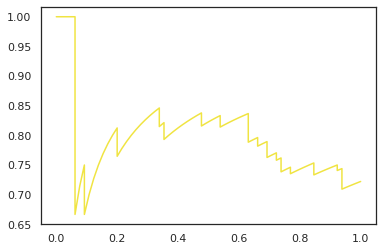

GeneOntology
90


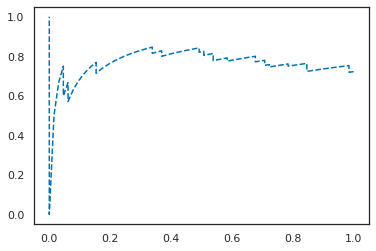

CellScape
90


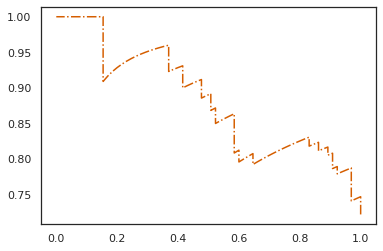

MOA
90


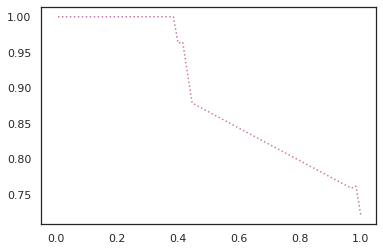

CellScape with Cmax unbound
78


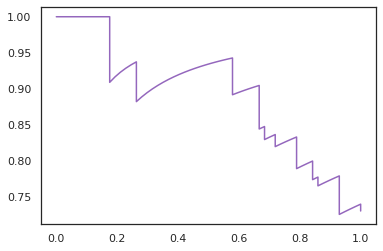

CellScape with Cmax total
90


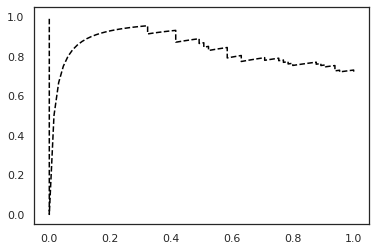

MOA with Cmax unbound
78


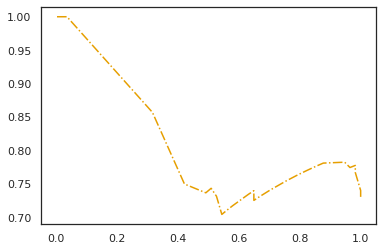

MOA with Cmax total
90


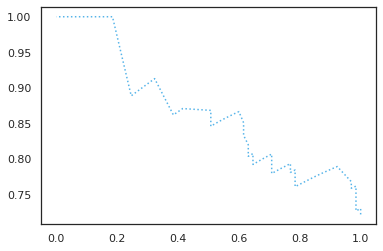

Ensemble (selected models)
90


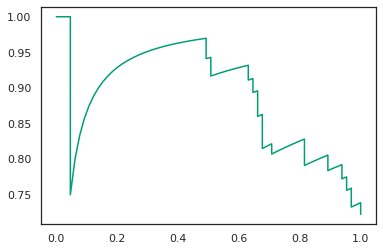

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


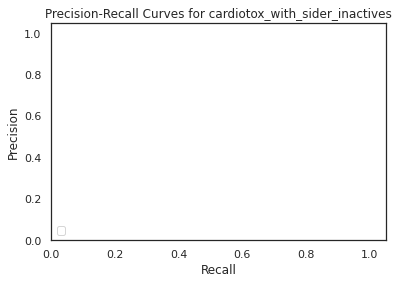

cardiotox_with_sider_all
Ensemble (all models)
82


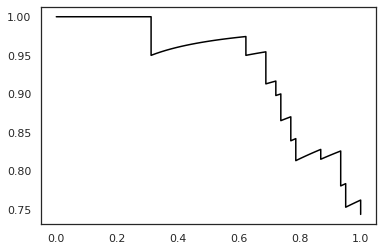

Structural
90


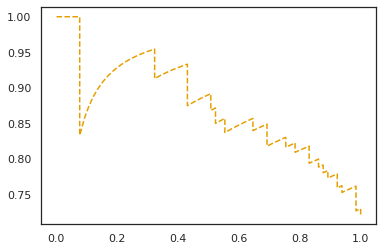

Mordred
90


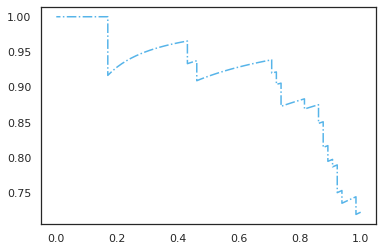

Cell Painting
90


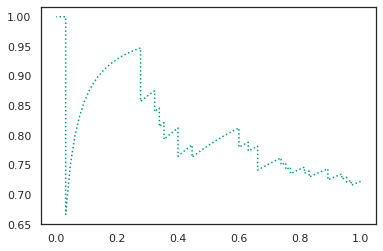

LINCSL1000
90


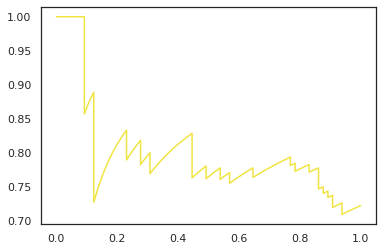

GeneOntology
90


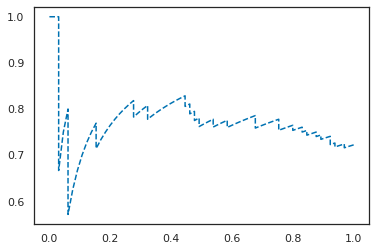

CellScape
90


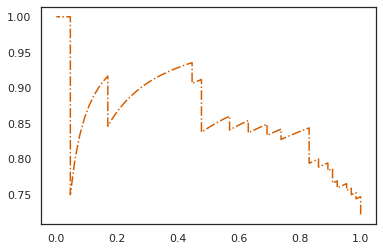

MOA
90


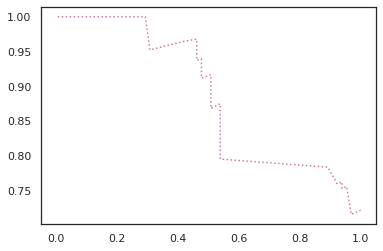

CellScape with Cmax unbound
78


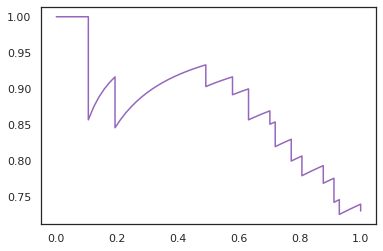

CellScape with Cmax total
90


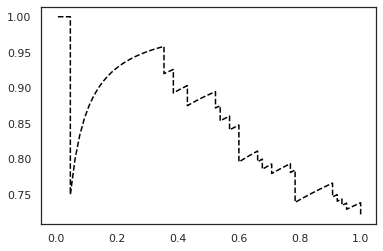

MOA with Cmax unbound
78


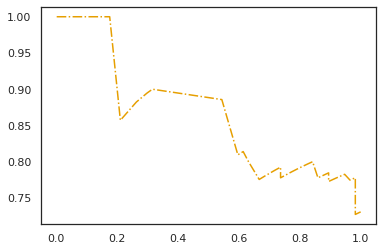

MOA with Cmax total
90


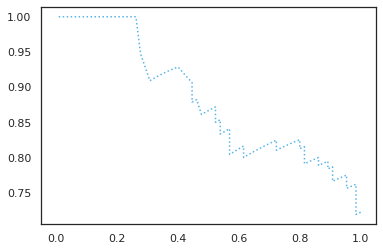

Ensemble (selected models)
90


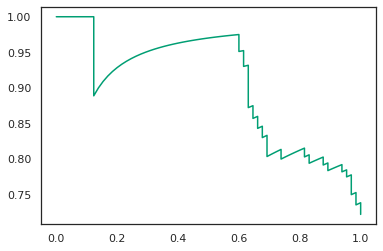

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


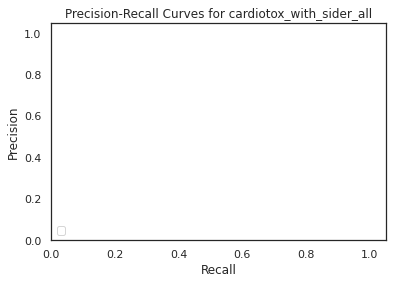

cardiotox_with_sider_actives
Ensemble (all models)
82


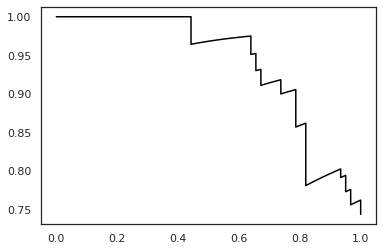

Structural
90


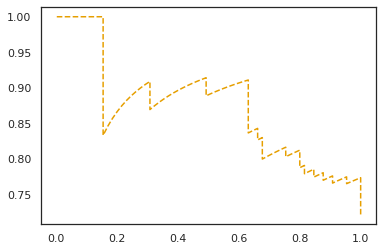

Mordred
90


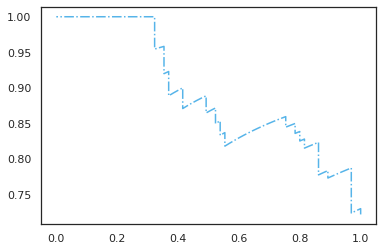

Cell Painting
90


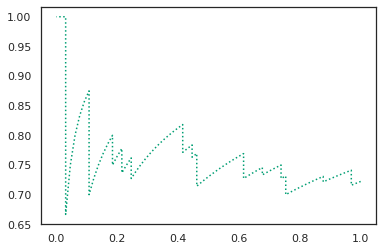

LINCSL1000
90


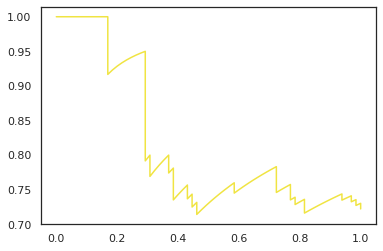

GeneOntology
90


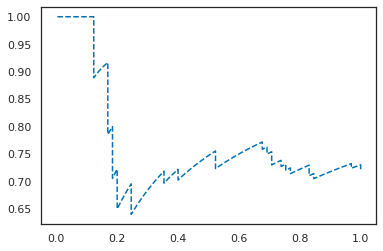

CellScape
90


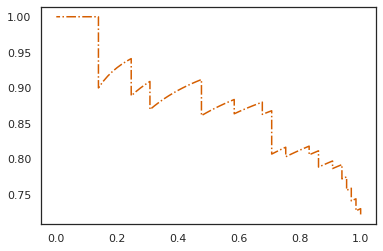

MOA
90


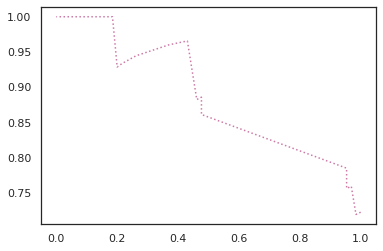

CellScape with Cmax unbound
78


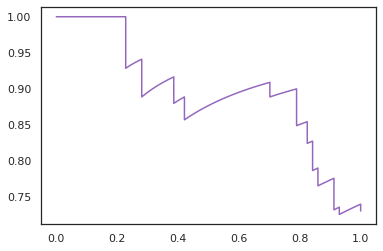

CellScape with Cmax total
90


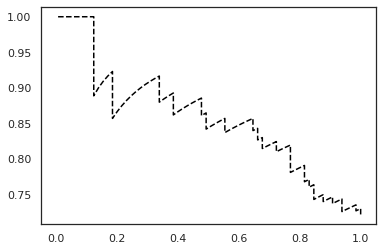

MOA with Cmax unbound
78


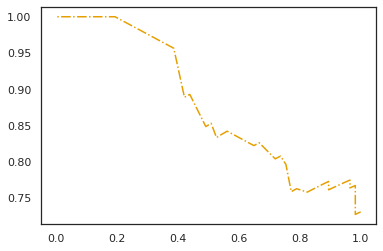

MOA with Cmax total
90


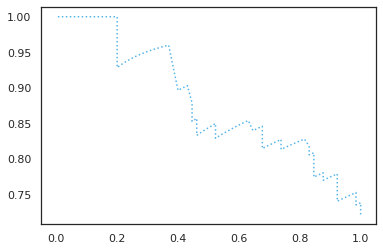

Ensemble (selected models)
90


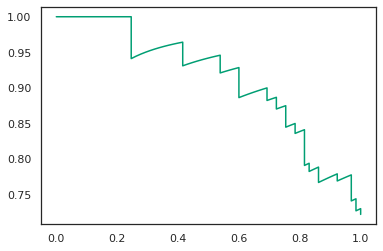

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


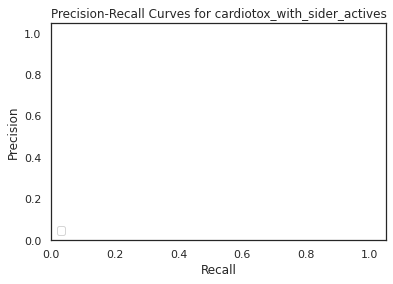

DICTrank
Ensemble (all models)
82


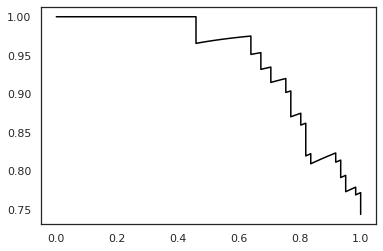

Structural
90


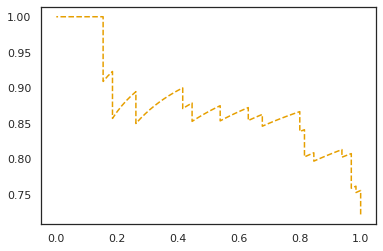

Mordred
90


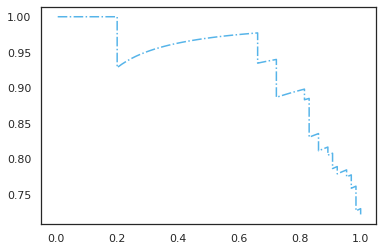

Cell Painting
90


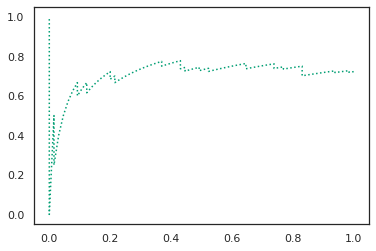

LINCSL1000
90


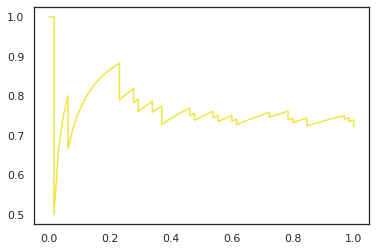

GeneOntology
90


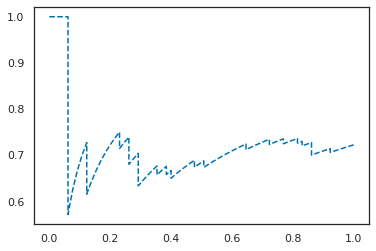

CellScape
90


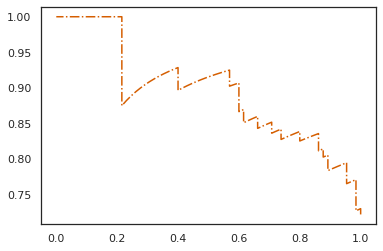

MOA
90


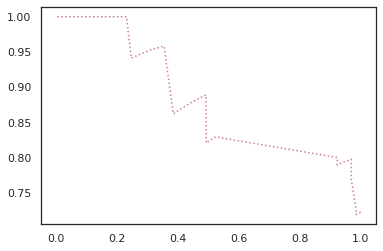

CellScape with Cmax unbound
78


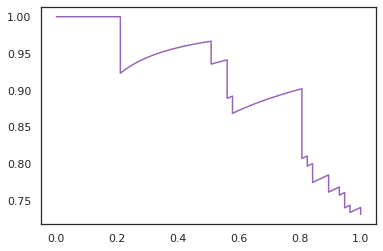

CellScape with Cmax total
90


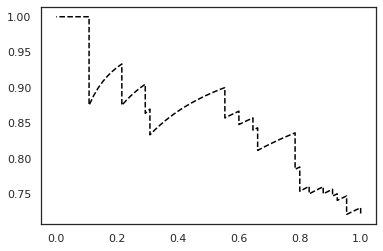

MOA with Cmax unbound
78


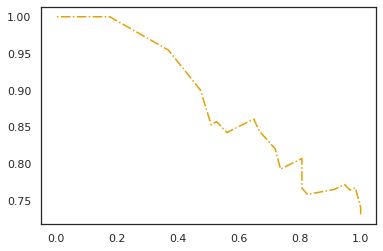

MOA with Cmax total
90


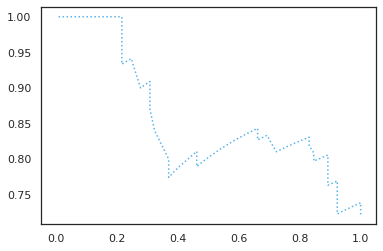

Ensemble (selected models)
90


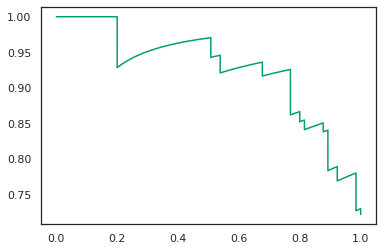

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


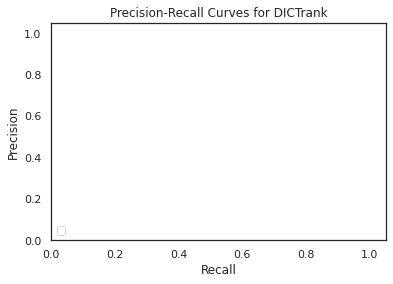

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
import seaborn as sns

# Define a colorblind-friendly palette and line styles
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#9467bd"]

line_styles = ['solid', 'dashed', 'dashdot', 'dotted']

# Loop through each dataset
for dataset in ['sider_cardiacdisorders', 'cardiotox_with_sider_inactives',
                'cardiotox_with_sider_all', 'cardiotox_with_sider_actives',
                'DICTrank']:
    print(dataset)
    df_dataset = allresults[allresults["Dataset"] == dataset]

    #plt.figure(figsize=(10, 10), dpi=300)
    sns.set(style="white")  # Set the style

    # For each unique feature in the dataset, plot the AUC-PR curve
    for idx, feature in enumerate(df_dataset["Features"].unique()):
        print(feature)
        df_feature = df_dataset[df_dataset["Features"] == feature]
        print(len(df_feature))
        precision, recall, _ = precision_recall_curve(df_feature["True_Value"], df_feature["Probability"])
        pr_auc = auc(recall, precision)

        plt.plot(recall, precision, label=f'{feature} (AUC-PR = {pr_auc:.2f})',
                 color=palette[idx % len(palette)],
                 linestyle=line_styles[idx % len(line_styles)])
        plt.show()

    # Aesthetics for the plot
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curves for {dataset}')
    plt.legend(loc='lower left')
    plt.show()
